In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchsummaryX import summary
import matplotlib.pyplot as plt
import time
import os

from UnarySim.sw.kernel.nn_utils import *
from UnarySim.sw.kernel.linear import UnaryLinear
from UnarySim.sw.kernel.relu import UnaryReLU
from UnarySim.sw.stream.gen import RNG, SourceGen, BSGen
from UnarySim.sw.metric.metric import ProgressiveError, NormStability
import time
import math
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [3]:
cwd = os.getcwd()
print(cwd)

d:\project\Anaconda3\Lib\site-packages\UnarySim\sw\test\metric


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
print(device)

cpu


In [5]:
# MNIST data loader
transform=transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root=cwd+'/../data/mnist', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=4)

testset = torchvision.datasets.MNIST(root=cwd+'/../data/mnist', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, num_workers=4)

# test binary model clamp

In [6]:
model_path = cwd+"\..\mlp\saved_model_state_dict"+"_8_clamp"
# model_path = cwd+"\..\mlp\saved_model_state_dict"+"_8_no_clamp_new"
# model_clamp = MLP3()
model_clamp = MLP3_clamp_eval()
model_clamp.to(device)
model_clamp.load_state_dict(torch.load(model_path))
model_clamp.eval()
model_clamp.to(device)
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model_clamp(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 95.180000 %


# test unary model nonscaled addition - clamp binary

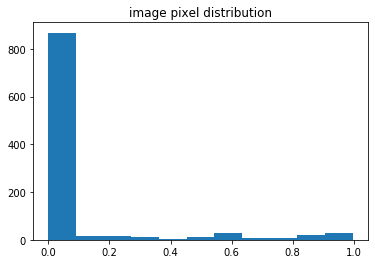

53 cycle:  1 -th image succeeds.
54 cycle:  1 -th image succeeds.
55 cycle:  1 -th image succeeds.
56 cycle:  1 -th image succeeds.
57 cycle:  1 -th image succeeds.
58 cycle:  1 -th image succeeds.
59 cycle:  1 -th image succeeds.
60 cycle:  1 -th image succeeds.
61 cycle:  1 -th image succeeds.
62 cycle:  1 -th image succeeds.
63 cycle:  1 -th image succeeds.
64 cycle:  1 -th image succeeds.
65 cycle:  1 -th image succeeds.
66 cycle:  1 -th image succeeds.
67 cycle:  1 -th image succeeds.
68 cycle:  1 -th image succeeds.
69 cycle:  1 -th image succeeds.
70 cycle:  1 -th image succeeds.
71 cycle:  1 -th image succeeds.
72 cycle:  1 -th image succeeds.
73 cycle:  1 -th image succeeds.
74 cycle:  1 -th image succeeds.
75 cycle:  1 -th image succeeds.
76 cycle:  1 -th image succeeds.
77 cycle:  1 -th image succeeds.
78 cycle:  1 -th image succeeds.
79 cycle:  1 -th image succeeds.
80 cycle:  1 -th image succeeds.
81 cycle:  1 -th image succeeds.
82 cycle:  1 -th image succeeds.
83 cycle: 

295 cycle:  1 -th image succeeds.
296 cycle:  1 -th image succeeds.
297 cycle:  1 -th image succeeds.
298 cycle:  1 -th image succeeds.
299 cycle:  1 -th image succeeds.
300 cycle:  1 -th image succeeds.
301 cycle:  1 -th image succeeds.
302 cycle:  1 -th image succeeds.
303 cycle:  1 -th image succeeds.
304 cycle:  1 -th image succeeds.
305 cycle:  1 -th image succeeds.
306 cycle:  1 -th image succeeds.
307 cycle:  1 -th image succeeds.
308 cycle:  1 -th image succeeds.
309 cycle:  1 -th image succeeds.
310 cycle:  1 -th image succeeds.
311 cycle:  1 -th image succeeds.
312 cycle:  1 -th image succeeds.
313 cycle:  1 -th image succeeds.
314 cycle:  1 -th image succeeds.
315 cycle:  1 -th image succeeds.
316 cycle:  1 -th image succeeds.
317 cycle:  1 -th image succeeds.
318 cycle:  1 -th image succeeds.
319 cycle:  1 -th image succeeds.
320 cycle:  1 -th image succeeds.
321 cycle:  1 -th image succeeds.
322 cycle:  1 -th image succeeds.
323 cycle:  1 -th image succeeds.
324 cycle:  1 

535 cycle:  1 -th image succeeds.
536 cycle:  1 -th image succeeds.
537 cycle:  1 -th image succeeds.
538 cycle:  1 -th image succeeds.
539 cycle:  1 -th image succeeds.
540 cycle:  1 -th image succeeds.
541 cycle:  1 -th image succeeds.
542 cycle:  1 -th image succeeds.
543 cycle:  1 -th image succeeds.
544 cycle:  1 -th image succeeds.
545 cycle:  1 -th image succeeds.
546 cycle:  1 -th image succeeds.
547 cycle:  1 -th image succeeds.
548 cycle:  1 -th image succeeds.
549 cycle:  1 -th image succeeds.
550 cycle:  1 -th image succeeds.
551 cycle:  1 -th image succeeds.
552 cycle:  1 -th image succeeds.
553 cycle:  1 -th image succeeds.
554 cycle:  1 -th image succeeds.
555 cycle:  1 -th image succeeds.
556 cycle:  1 -th image succeeds.
557 cycle:  1 -th image succeeds.
558 cycle:  1 -th image succeeds.
559 cycle:  1 -th image succeeds.
560 cycle:  1 -th image succeeds.
561 cycle:  1 -th image succeeds.
562 cycle:  1 -th image succeeds.
563 cycle:  1 -th image succeeds.
564 cycle:  1 

775 cycle:  1 -th image succeeds.
776 cycle:  1 -th image succeeds.
777 cycle:  1 -th image succeeds.
778 cycle:  1 -th image succeeds.
779 cycle:  1 -th image succeeds.
780 cycle:  1 -th image succeeds.
781 cycle:  1 -th image succeeds.
782 cycle:  1 -th image succeeds.
783 cycle:  1 -th image succeeds.
784 cycle:  1 -th image succeeds.
785 cycle:  1 -th image succeeds.
786 cycle:  1 -th image succeeds.
787 cycle:  1 -th image succeeds.
788 cycle:  1 -th image succeeds.
789 cycle:  1 -th image succeeds.
790 cycle:  1 -th image succeeds.
791 cycle:  1 -th image succeeds.
792 cycle:  1 -th image succeeds.
793 cycle:  1 -th image succeeds.
794 cycle:  1 -th image succeeds.
795 cycle:  1 -th image succeeds.
796 cycle:  1 -th image succeeds.
797 cycle:  1 -th image succeeds.
798 cycle:  1 -th image succeeds.
799 cycle:  1 -th image succeeds.
800 cycle:  1 -th image succeeds.
801 cycle:  1 -th image succeeds.
802 cycle:  1 -th image succeeds.
803 cycle:  1 -th image succeeds.
804 cycle:  1 

1015 cycle:  1 -th image succeeds.
1016 cycle:  1 -th image succeeds.
1017 cycle:  1 -th image succeeds.
1018 cycle:  1 -th image succeeds.
1019 cycle:  1 -th image succeeds.
1020 cycle:  1 -th image succeeds.
1021 cycle:  1 -th image succeeds.
1022 cycle:  1 -th image succeeds.
1023 cycle:  1 -th image succeeds.
1024 cycle:  1 -th image succeeds.
1025 cycle:  1 -th image succeeds.
1026 cycle:  1 -th image succeeds.
1027 cycle:  1 -th image succeeds.
1028 cycle:  1 -th image succeeds.
1029 cycle:  1 -th image succeeds.
1030 cycle:  1 -th image succeeds.
1031 cycle:  1 -th image succeeds.
1032 cycle:  1 -th image succeeds.
1033 cycle:  1 -th image succeeds.
1034 cycle:  1 -th image succeeds.
1035 cycle:  1 -th image succeeds.
1036 cycle:  1 -th image succeeds.
1037 cycle:  1 -th image succeeds.
1038 cycle:  1 -th image succeeds.
1039 cycle:  1 -th image succeeds.
1040 cycle:  1 -th image succeeds.
1041 cycle:  1 -th image succeeds.
1042 cycle:  1 -th image succeeds.
1043 cycle:  1 -th i

1249 cycle:  1 -th image succeeds.
1250 cycle:  1 -th image succeeds.
1251 cycle:  1 -th image succeeds.
1252 cycle:  1 -th image succeeds.
1253 cycle:  1 -th image succeeds.
1254 cycle:  1 -th image succeeds.
1255 cycle:  1 -th image succeeds.
1256 cycle:  1 -th image succeeds.
1257 cycle:  1 -th image succeeds.
1258 cycle:  1 -th image succeeds.
1259 cycle:  1 -th image succeeds.
1260 cycle:  1 -th image succeeds.
1261 cycle:  1 -th image succeeds.
1262 cycle:  1 -th image succeeds.
1263 cycle:  1 -th image succeeds.
1264 cycle:  1 -th image succeeds.
1265 cycle:  1 -th image succeeds.
1266 cycle:  1 -th image succeeds.
1267 cycle:  1 -th image succeeds.
1268 cycle:  1 -th image succeeds.
1269 cycle:  1 -th image succeeds.
1270 cycle:  1 -th image succeeds.
1271 cycle:  1 -th image succeeds.
1272 cycle:  1 -th image succeeds.
1273 cycle:  1 -th image succeeds.
1274 cycle:  1 -th image succeeds.
1275 cycle:  1 -th image succeeds.
1276 cycle:  1 -th image succeeds.
1277 cycle:  1 -th i

1483 cycle:  1 -th image succeeds.
1484 cycle:  1 -th image succeeds.
1485 cycle:  1 -th image succeeds.
1486 cycle:  1 -th image succeeds.
1487 cycle:  1 -th image succeeds.
1488 cycle:  1 -th image succeeds.
1489 cycle:  1 -th image succeeds.
1490 cycle:  1 -th image succeeds.
1491 cycle:  1 -th image succeeds.
1492 cycle:  1 -th image succeeds.
1493 cycle:  1 -th image succeeds.
1494 cycle:  1 -th image succeeds.
1495 cycle:  1 -th image succeeds.
1496 cycle:  1 -th image succeeds.
1497 cycle:  1 -th image succeeds.
1498 cycle:  1 -th image succeeds.
1499 cycle:  1 -th image succeeds.
1500 cycle:  1 -th image succeeds.
1501 cycle:  1 -th image succeeds.
1502 cycle:  1 -th image succeeds.
1503 cycle:  1 -th image succeeds.
1504 cycle:  1 -th image succeeds.
1505 cycle:  1 -th image succeeds.
1506 cycle:  1 -th image succeeds.
1507 cycle:  1 -th image succeeds.
1508 cycle:  1 -th image succeeds.
1509 cycle:  1 -th image succeeds.
1510 cycle:  1 -th image succeeds.
1511 cycle:  1 -th i

1717 cycle:  1 -th image succeeds.
1718 cycle:  1 -th image succeeds.
1719 cycle:  1 -th image succeeds.
1720 cycle:  1 -th image succeeds.
1721 cycle:  1 -th image succeeds.
1722 cycle:  1 -th image succeeds.
1723 cycle:  1 -th image succeeds.
1724 cycle:  1 -th image succeeds.
1725 cycle:  1 -th image succeeds.
1726 cycle:  1 -th image succeeds.
1727 cycle:  1 -th image succeeds.
1728 cycle:  1 -th image succeeds.
1729 cycle:  1 -th image succeeds.
1730 cycle:  1 -th image succeeds.
1731 cycle:  1 -th image succeeds.
1732 cycle:  1 -th image succeeds.
1733 cycle:  1 -th image succeeds.
1734 cycle:  1 -th image succeeds.
1735 cycle:  1 -th image succeeds.
1736 cycle:  1 -th image succeeds.
1737 cycle:  1 -th image succeeds.
1738 cycle:  1 -th image succeeds.
1739 cycle:  1 -th image succeeds.
1740 cycle:  1 -th image succeeds.
1741 cycle:  1 -th image succeeds.
1742 cycle:  1 -th image succeeds.
1743 cycle:  1 -th image succeeds.
1744 cycle:  1 -th image succeeds.
1745 cycle:  1 -th i

1951 cycle:  1 -th image succeeds.
1952 cycle:  1 -th image succeeds.
1953 cycle:  1 -th image succeeds.
1954 cycle:  1 -th image succeeds.
1955 cycle:  1 -th image succeeds.
1956 cycle:  1 -th image succeeds.
1957 cycle:  1 -th image succeeds.
1958 cycle:  1 -th image succeeds.
1959 cycle:  1 -th image succeeds.
1960 cycle:  1 -th image succeeds.
1961 cycle:  1 -th image succeeds.
1962 cycle:  1 -th image succeeds.
1963 cycle:  1 -th image succeeds.
1964 cycle:  1 -th image succeeds.
1965 cycle:  1 -th image succeeds.
1966 cycle:  1 -th image succeeds.
1967 cycle:  1 -th image succeeds.
1968 cycle:  1 -th image succeeds.
1969 cycle:  1 -th image succeeds.
1970 cycle:  1 -th image succeeds.
1971 cycle:  1 -th image succeeds.
1972 cycle:  1 -th image succeeds.
1973 cycle:  1 -th image succeeds.
1974 cycle:  1 -th image succeeds.
1975 cycle:  1 -th image succeeds.
1976 cycle:  1 -th image succeeds.
1977 cycle:  1 -th image succeeds.
1978 cycle:  1 -th image succeeds.
1979 cycle:  1 -th i

2185 cycle:  1 -th image succeeds.
2186 cycle:  1 -th image succeeds.
2187 cycle:  1 -th image succeeds.
2188 cycle:  1 -th image succeeds.
2189 cycle:  1 -th image succeeds.
2190 cycle:  1 -th image succeeds.
2191 cycle:  1 -th image succeeds.
2192 cycle:  1 -th image succeeds.
2193 cycle:  1 -th image succeeds.
2194 cycle:  1 -th image succeeds.
2195 cycle:  1 -th image succeeds.
2196 cycle:  1 -th image succeeds.
2197 cycle:  1 -th image succeeds.
2198 cycle:  1 -th image succeeds.
2199 cycle:  1 -th image succeeds.
2200 cycle:  1 -th image succeeds.
2201 cycle:  1 -th image succeeds.
2202 cycle:  1 -th image succeeds.
2203 cycle:  1 -th image succeeds.
2204 cycle:  1 -th image succeeds.
2205 cycle:  1 -th image succeeds.
2206 cycle:  1 -th image succeeds.
2207 cycle:  1 -th image succeeds.
2208 cycle:  1 -th image succeeds.
2209 cycle:  1 -th image succeeds.
2210 cycle:  1 -th image succeeds.
2211 cycle:  1 -th image succeeds.
2212 cycle:  1 -th image succeeds.
2213 cycle:  1 -th i

2419 cycle:  1 -th image succeeds.
2420 cycle:  1 -th image succeeds.
2421 cycle:  1 -th image succeeds.
2422 cycle:  1 -th image succeeds.
2423 cycle:  1 -th image succeeds.
2424 cycle:  1 -th image succeeds.
2425 cycle:  1 -th image succeeds.
2426 cycle:  1 -th image succeeds.
2427 cycle:  1 -th image succeeds.
2428 cycle:  1 -th image succeeds.
2429 cycle:  1 -th image succeeds.
2430 cycle:  1 -th image succeeds.
2431 cycle:  1 -th image succeeds.
2432 cycle:  1 -th image succeeds.
2433 cycle:  1 -th image succeeds.
2434 cycle:  1 -th image succeeds.
2435 cycle:  1 -th image succeeds.
2436 cycle:  1 -th image succeeds.
2437 cycle:  1 -th image succeeds.
2438 cycle:  1 -th image succeeds.
2439 cycle:  1 -th image succeeds.
2440 cycle:  1 -th image succeeds.
2441 cycle:  1 -th image succeeds.
2442 cycle:  1 -th image succeeds.
2443 cycle:  1 -th image succeeds.
2444 cycle:  1 -th image succeeds.
2445 cycle:  1 -th image succeeds.
2446 cycle:  1 -th image succeeds.
2447 cycle:  1 -th i

2653 cycle:  1 -th image succeeds.
2654 cycle:  1 -th image succeeds.
2655 cycle:  1 -th image succeeds.
2656 cycle:  1 -th image succeeds.
2657 cycle:  1 -th image succeeds.
2658 cycle:  1 -th image succeeds.
2659 cycle:  1 -th image succeeds.
2660 cycle:  1 -th image succeeds.
2661 cycle:  1 -th image succeeds.
2662 cycle:  1 -th image succeeds.
2663 cycle:  1 -th image succeeds.
2664 cycle:  1 -th image succeeds.
2665 cycle:  1 -th image succeeds.
2666 cycle:  1 -th image succeeds.
2667 cycle:  1 -th image succeeds.
2668 cycle:  1 -th image succeeds.
2669 cycle:  1 -th image succeeds.
2670 cycle:  1 -th image succeeds.
2671 cycle:  1 -th image succeeds.
2672 cycle:  1 -th image succeeds.
2673 cycle:  1 -th image succeeds.
2674 cycle:  1 -th image succeeds.
2675 cycle:  1 -th image succeeds.
2676 cycle:  1 -th image succeeds.
2677 cycle:  1 -th image succeeds.
2678 cycle:  1 -th image succeeds.
2679 cycle:  1 -th image succeeds.
2680 cycle:  1 -th image succeeds.
2681 cycle:  1 -th i

2887 cycle:  1 -th image succeeds.
2888 cycle:  1 -th image succeeds.
2889 cycle:  1 -th image succeeds.
2890 cycle:  1 -th image succeeds.
2891 cycle:  1 -th image succeeds.
2892 cycle:  1 -th image succeeds.
2893 cycle:  1 -th image succeeds.
2894 cycle:  1 -th image succeeds.
2895 cycle:  1 -th image succeeds.
2896 cycle:  1 -th image succeeds.
2897 cycle:  1 -th image succeeds.
2898 cycle:  1 -th image succeeds.
2899 cycle:  1 -th image succeeds.
2900 cycle:  1 -th image succeeds.
2901 cycle:  1 -th image succeeds.
2902 cycle:  1 -th image succeeds.
2903 cycle:  1 -th image succeeds.
2904 cycle:  1 -th image succeeds.
2905 cycle:  1 -th image succeeds.
2906 cycle:  1 -th image succeeds.
2907 cycle:  1 -th image succeeds.
2908 cycle:  1 -th image succeeds.
2909 cycle:  1 -th image succeeds.
2910 cycle:  1 -th image succeeds.
2911 cycle:  1 -th image succeeds.
2912 cycle:  1 -th image succeeds.
2913 cycle:  1 -th image succeeds.
2914 cycle:  1 -th image succeeds.
2915 cycle:  1 -th i

3121 cycle:  1 -th image succeeds.
3122 cycle:  1 -th image succeeds.
3123 cycle:  1 -th image succeeds.
3124 cycle:  1 -th image succeeds.
3125 cycle:  1 -th image succeeds.
3126 cycle:  1 -th image succeeds.
3127 cycle:  1 -th image succeeds.
3128 cycle:  1 -th image succeeds.
3129 cycle:  1 -th image succeeds.
3130 cycle:  1 -th image succeeds.
3131 cycle:  1 -th image succeeds.
3132 cycle:  1 -th image succeeds.
3133 cycle:  1 -th image succeeds.
3134 cycle:  1 -th image succeeds.
3135 cycle:  1 -th image succeeds.
3136 cycle:  1 -th image succeeds.
3137 cycle:  1 -th image succeeds.
3138 cycle:  1 -th image succeeds.
3139 cycle:  1 -th image succeeds.
3140 cycle:  1 -th image succeeds.
3141 cycle:  1 -th image succeeds.
3142 cycle:  1 -th image succeeds.
3143 cycle:  1 -th image succeeds.
3144 cycle:  1 -th image succeeds.
3145 cycle:  1 -th image succeeds.
3146 cycle:  1 -th image succeeds.
3147 cycle:  1 -th image succeeds.
3148 cycle:  1 -th image succeeds.
3149 cycle:  1 -th i

3355 cycle:  1 -th image succeeds.
3356 cycle:  1 -th image succeeds.
3357 cycle:  1 -th image succeeds.
3358 cycle:  1 -th image succeeds.
3359 cycle:  1 -th image succeeds.
3360 cycle:  1 -th image succeeds.
3361 cycle:  1 -th image succeeds.
3362 cycle:  1 -th image succeeds.
3363 cycle:  1 -th image succeeds.
3364 cycle:  1 -th image succeeds.
3365 cycle:  1 -th image succeeds.
3366 cycle:  1 -th image succeeds.
3367 cycle:  1 -th image succeeds.
3368 cycle:  1 -th image succeeds.
3369 cycle:  1 -th image succeeds.
3370 cycle:  1 -th image succeeds.
3371 cycle:  1 -th image succeeds.
3372 cycle:  1 -th image succeeds.
3373 cycle:  1 -th image succeeds.
3374 cycle:  1 -th image succeeds.
3375 cycle:  1 -th image succeeds.
3376 cycle:  1 -th image succeeds.
3377 cycle:  1 -th image succeeds.
3378 cycle:  1 -th image succeeds.
3379 cycle:  1 -th image succeeds.
3380 cycle:  1 -th image succeeds.
3381 cycle:  1 -th image succeeds.
3382 cycle:  1 -th image succeeds.
3383 cycle:  1 -th i

3589 cycle:  1 -th image succeeds.
3590 cycle:  1 -th image succeeds.
3591 cycle:  1 -th image succeeds.
3592 cycle:  1 -th image succeeds.
3593 cycle:  1 -th image succeeds.
3594 cycle:  1 -th image succeeds.
3595 cycle:  1 -th image succeeds.
3596 cycle:  1 -th image succeeds.
3597 cycle:  1 -th image succeeds.
3598 cycle:  1 -th image succeeds.
3599 cycle:  1 -th image succeeds.
3600 cycle:  1 -th image succeeds.
3601 cycle:  1 -th image succeeds.
3602 cycle:  1 -th image succeeds.
3603 cycle:  1 -th image succeeds.
3604 cycle:  1 -th image succeeds.
3605 cycle:  1 -th image succeeds.
3606 cycle:  1 -th image succeeds.
3607 cycle:  1 -th image succeeds.
3608 cycle:  1 -th image succeeds.
3609 cycle:  1 -th image succeeds.
3610 cycle:  1 -th image succeeds.
3611 cycle:  1 -th image succeeds.
3612 cycle:  1 -th image succeeds.
3613 cycle:  1 -th image succeeds.
3614 cycle:  1 -th image succeeds.
3615 cycle:  1 -th image succeeds.
3616 cycle:  1 -th image succeeds.
3617 cycle:  1 -th i

3823 cycle:  1 -th image succeeds.
3824 cycle:  1 -th image succeeds.
3825 cycle:  1 -th image succeeds.
3826 cycle:  1 -th image succeeds.
3827 cycle:  1 -th image succeeds.
3828 cycle:  1 -th image succeeds.
3829 cycle:  1 -th image succeeds.
3830 cycle:  1 -th image succeeds.
3831 cycle:  1 -th image succeeds.
3832 cycle:  1 -th image succeeds.
3833 cycle:  1 -th image succeeds.
3834 cycle:  1 -th image succeeds.
3835 cycle:  1 -th image succeeds.
3836 cycle:  1 -th image succeeds.
3837 cycle:  1 -th image succeeds.
3838 cycle:  1 -th image succeeds.
3839 cycle:  1 -th image succeeds.
3840 cycle:  1 -th image succeeds.
3841 cycle:  1 -th image succeeds.
3842 cycle:  1 -th image succeeds.
3843 cycle:  1 -th image succeeds.
3844 cycle:  1 -th image succeeds.
3845 cycle:  1 -th image succeeds.
3846 cycle:  1 -th image succeeds.
3847 cycle:  1 -th image succeeds.
3848 cycle:  1 -th image succeeds.
3849 cycle:  1 -th image succeeds.
3850 cycle:  1 -th image succeeds.
3851 cycle:  1 -th i

4057 cycle:  1 -th image succeeds.
4058 cycle:  1 -th image succeeds.
4059 cycle:  1 -th image succeeds.
4060 cycle:  1 -th image succeeds.
4061 cycle:  1 -th image succeeds.
4062 cycle:  1 -th image succeeds.
4063 cycle:  1 -th image succeeds.
4064 cycle:  1 -th image succeeds.
4065 cycle:  1 -th image succeeds.
4066 cycle:  1 -th image succeeds.
4067 cycle:  1 -th image succeeds.
4068 cycle:  1 -th image succeeds.
4069 cycle:  1 -th image succeeds.
4070 cycle:  1 -th image succeeds.
4071 cycle:  1 -th image succeeds.
4072 cycle:  1 -th image succeeds.
4073 cycle:  1 -th image succeeds.
4074 cycle:  1 -th image succeeds.
4075 cycle:  1 -th image succeeds.
4076 cycle:  1 -th image succeeds.
4077 cycle:  1 -th image succeeds.
4078 cycle:  1 -th image succeeds.
4079 cycle:  1 -th image succeeds.
4080 cycle:  1 -th image succeeds.
4081 cycle:  1 -th image succeeds.
4082 cycle:  1 -th image succeeds.
4083 cycle:  1 -th image succeeds.
4084 cycle:  1 -th image succeeds.
4085 cycle:  1 -th i

4291 cycle:  1 -th image succeeds.
4292 cycle:  1 -th image succeeds.
4293 cycle:  1 -th image succeeds.
4294 cycle:  1 -th image succeeds.
4295 cycle:  1 -th image succeeds.
4296 cycle:  1 -th image succeeds.
4297 cycle:  1 -th image succeeds.
4298 cycle:  1 -th image succeeds.
4299 cycle:  1 -th image succeeds.
4300 cycle:  1 -th image succeeds.
4301 cycle:  1 -th image succeeds.
4302 cycle:  1 -th image succeeds.
4303 cycle:  1 -th image succeeds.
4304 cycle:  1 -th image succeeds.
4305 cycle:  1 -th image succeeds.
4306 cycle:  1 -th image succeeds.
4307 cycle:  1 -th image succeeds.
4308 cycle:  1 -th image succeeds.
4309 cycle:  1 -th image succeeds.
4310 cycle:  1 -th image succeeds.
4311 cycle:  1 -th image succeeds.
4312 cycle:  1 -th image succeeds.
4313 cycle:  1 -th image succeeds.
4314 cycle:  1 -th image succeeds.
4315 cycle:  1 -th image succeeds.
4316 cycle:  1 -th image succeeds.
4317 cycle:  1 -th image succeeds.
4318 cycle:  1 -th image succeeds.
4319 cycle:  1 -th i

4525 cycle:  1 -th image succeeds.
4526 cycle:  1 -th image succeeds.
4527 cycle:  1 -th image succeeds.
4528 cycle:  1 -th image succeeds.
4529 cycle:  1 -th image succeeds.
4530 cycle:  1 -th image succeeds.
4531 cycle:  1 -th image succeeds.
4532 cycle:  1 -th image succeeds.
4533 cycle:  1 -th image succeeds.
4534 cycle:  1 -th image succeeds.
4535 cycle:  1 -th image succeeds.
4536 cycle:  1 -th image succeeds.
4537 cycle:  1 -th image succeeds.
4538 cycle:  1 -th image succeeds.
4539 cycle:  1 -th image succeeds.
4540 cycle:  1 -th image succeeds.
4541 cycle:  1 -th image succeeds.
4542 cycle:  1 -th image succeeds.
4543 cycle:  1 -th image succeeds.
4544 cycle:  1 -th image succeeds.
4545 cycle:  1 -th image succeeds.
4546 cycle:  1 -th image succeeds.
4547 cycle:  1 -th image succeeds.
4548 cycle:  1 -th image succeeds.
4549 cycle:  1 -th image succeeds.
4550 cycle:  1 -th image succeeds.
4551 cycle:  1 -th image succeeds.
4552 cycle:  1 -th image succeeds.
4553 cycle:  1 -th i

4759 cycle:  1 -th image succeeds.
4760 cycle:  1 -th image succeeds.
4761 cycle:  1 -th image succeeds.
4762 cycle:  1 -th image succeeds.
4763 cycle:  1 -th image succeeds.
4764 cycle:  1 -th image succeeds.
4765 cycle:  1 -th image succeeds.
4766 cycle:  1 -th image succeeds.
4767 cycle:  1 -th image succeeds.
4768 cycle:  1 -th image succeeds.
4769 cycle:  1 -th image succeeds.
4770 cycle:  1 -th image succeeds.
4771 cycle:  1 -th image succeeds.
4772 cycle:  1 -th image succeeds.
4773 cycle:  1 -th image succeeds.
4774 cycle:  1 -th image succeeds.
4775 cycle:  1 -th image succeeds.
4776 cycle:  1 -th image succeeds.
4777 cycle:  1 -th image succeeds.
4778 cycle:  1 -th image succeeds.
4779 cycle:  1 -th image succeeds.
4780 cycle:  1 -th image succeeds.
4781 cycle:  1 -th image succeeds.
4782 cycle:  1 -th image succeeds.
4783 cycle:  1 -th image succeeds.
4784 cycle:  1 -th image succeeds.
4785 cycle:  1 -th image succeeds.
4786 cycle:  1 -th image succeeds.
4787 cycle:  1 -th i

4993 cycle:  1 -th image succeeds.
4994 cycle:  1 -th image succeeds.
4995 cycle:  1 -th image succeeds.
4996 cycle:  1 -th image succeeds.
4997 cycle:  1 -th image succeeds.
4998 cycle:  1 -th image succeeds.
4999 cycle:  1 -th image succeeds.
5000 cycle:  1 -th image succeeds.
5001 cycle:  1 -th image succeeds.
5002 cycle:  1 -th image succeeds.
5003 cycle:  1 -th image succeeds.
5004 cycle:  1 -th image succeeds.
5005 cycle:  1 -th image succeeds.
5006 cycle:  1 -th image succeeds.
5007 cycle:  1 -th image succeeds.
5008 cycle:  1 -th image succeeds.
5009 cycle:  1 -th image succeeds.
5010 cycle:  1 -th image succeeds.
5011 cycle:  1 -th image succeeds.
5012 cycle:  1 -th image succeeds.
5013 cycle:  1 -th image succeeds.
5014 cycle:  1 -th image succeeds.
5015 cycle:  1 -th image succeeds.
5016 cycle:  1 -th image succeeds.
5017 cycle:  1 -th image succeeds.
5018 cycle:  1 -th image succeeds.
5019 cycle:  1 -th image succeeds.
5020 cycle:  1 -th image succeeds.
5021 cycle:  1 -th i

5227 cycle:  1 -th image succeeds.
5228 cycle:  1 -th image succeeds.
5229 cycle:  1 -th image succeeds.
5230 cycle:  1 -th image succeeds.
5231 cycle:  1 -th image succeeds.
5232 cycle:  1 -th image succeeds.
5233 cycle:  1 -th image succeeds.
5234 cycle:  1 -th image succeeds.
5235 cycle:  1 -th image succeeds.
5236 cycle:  1 -th image succeeds.
5237 cycle:  1 -th image succeeds.
5238 cycle:  1 -th image succeeds.
5239 cycle:  1 -th image succeeds.
5240 cycle:  1 -th image succeeds.
5241 cycle:  1 -th image succeeds.
5242 cycle:  1 -th image succeeds.
5243 cycle:  1 -th image succeeds.
5244 cycle:  1 -th image succeeds.
5245 cycle:  1 -th image succeeds.
5246 cycle:  1 -th image succeeds.
5247 cycle:  1 -th image succeeds.
5248 cycle:  1 -th image succeeds.
5249 cycle:  1 -th image succeeds.
5250 cycle:  1 -th image succeeds.
5251 cycle:  1 -th image succeeds.
5252 cycle:  1 -th image succeeds.
5253 cycle:  1 -th image succeeds.
5254 cycle:  1 -th image succeeds.
5255 cycle:  1 -th i

5461 cycle:  1 -th image succeeds.
5462 cycle:  1 -th image succeeds.
5463 cycle:  1 -th image succeeds.
5464 cycle:  1 -th image succeeds.
5465 cycle:  1 -th image succeeds.
5466 cycle:  1 -th image succeeds.
5467 cycle:  1 -th image succeeds.
5468 cycle:  1 -th image succeeds.
5469 cycle:  1 -th image succeeds.
5470 cycle:  1 -th image succeeds.
5471 cycle:  1 -th image succeeds.
5472 cycle:  1 -th image succeeds.
5473 cycle:  1 -th image succeeds.
5474 cycle:  1 -th image succeeds.
5475 cycle:  1 -th image succeeds.
5476 cycle:  1 -th image succeeds.
5477 cycle:  1 -th image succeeds.
5478 cycle:  1 -th image succeeds.
5479 cycle:  1 -th image succeeds.
5480 cycle:  1 -th image succeeds.
5481 cycle:  1 -th image succeeds.
5482 cycle:  1 -th image succeeds.
5483 cycle:  1 -th image succeeds.
5484 cycle:  1 -th image succeeds.
5485 cycle:  1 -th image succeeds.
5486 cycle:  1 -th image succeeds.
5487 cycle:  1 -th image succeeds.
5488 cycle:  1 -th image succeeds.
5489 cycle:  1 -th i

5695 cycle:  1 -th image succeeds.
5696 cycle:  1 -th image succeeds.
5697 cycle:  1 -th image succeeds.
5698 cycle:  1 -th image succeeds.
5699 cycle:  1 -th image succeeds.
5700 cycle:  1 -th image succeeds.
5701 cycle:  1 -th image succeeds.
5702 cycle:  1 -th image succeeds.
5703 cycle:  1 -th image succeeds.
5704 cycle:  1 -th image succeeds.
5705 cycle:  1 -th image succeeds.
5706 cycle:  1 -th image succeeds.
5707 cycle:  1 -th image succeeds.
5708 cycle:  1 -th image succeeds.
5709 cycle:  1 -th image succeeds.
5710 cycle:  1 -th image succeeds.
5711 cycle:  1 -th image succeeds.
5712 cycle:  1 -th image succeeds.
5713 cycle:  1 -th image succeeds.
5714 cycle:  1 -th image succeeds.
5715 cycle:  1 -th image succeeds.
5716 cycle:  1 -th image succeeds.
5717 cycle:  1 -th image succeeds.
5718 cycle:  1 -th image succeeds.
5719 cycle:  1 -th image succeeds.
5720 cycle:  1 -th image succeeds.
5721 cycle:  1 -th image succeeds.
5722 cycle:  1 -th image succeeds.
5723 cycle:  1 -th i

5929 cycle:  1 -th image succeeds.
5930 cycle:  1 -th image succeeds.
5931 cycle:  1 -th image succeeds.
5932 cycle:  1 -th image succeeds.
5933 cycle:  1 -th image succeeds.
5934 cycle:  1 -th image succeeds.
5935 cycle:  1 -th image succeeds.
5936 cycle:  1 -th image succeeds.
5937 cycle:  1 -th image succeeds.
5938 cycle:  1 -th image succeeds.
5939 cycle:  1 -th image succeeds.
5940 cycle:  1 -th image succeeds.
5941 cycle:  1 -th image succeeds.
5942 cycle:  1 -th image succeeds.
5943 cycle:  1 -th image succeeds.
5944 cycle:  1 -th image succeeds.
5945 cycle:  1 -th image succeeds.
5946 cycle:  1 -th image succeeds.
5947 cycle:  1 -th image succeeds.
5948 cycle:  1 -th image succeeds.
5949 cycle:  1 -th image succeeds.
5950 cycle:  1 -th image succeeds.
5951 cycle:  1 -th image succeeds.
5952 cycle:  1 -th image succeeds.
5953 cycle:  1 -th image succeeds.
5954 cycle:  1 -th image succeeds.
5955 cycle:  1 -th image succeeds.
5956 cycle:  1 -th image succeeds.
5957 cycle:  1 -th i

6163 cycle:  1 -th image succeeds.
6164 cycle:  1 -th image succeeds.
6165 cycle:  1 -th image succeeds.
6166 cycle:  1 -th image succeeds.
6167 cycle:  1 -th image succeeds.
6168 cycle:  1 -th image succeeds.
6169 cycle:  1 -th image succeeds.
6170 cycle:  1 -th image succeeds.
6171 cycle:  1 -th image succeeds.
6172 cycle:  1 -th image succeeds.
6173 cycle:  1 -th image succeeds.
6174 cycle:  1 -th image succeeds.
6175 cycle:  1 -th image succeeds.
6176 cycle:  1 -th image succeeds.
6177 cycle:  1 -th image succeeds.
6178 cycle:  1 -th image succeeds.
6179 cycle:  1 -th image succeeds.
6180 cycle:  1 -th image succeeds.
6181 cycle:  1 -th image succeeds.
6182 cycle:  1 -th image succeeds.
6183 cycle:  1 -th image succeeds.
6184 cycle:  1 -th image succeeds.
6185 cycle:  1 -th image succeeds.
6186 cycle:  1 -th image succeeds.
6187 cycle:  1 -th image succeeds.
6188 cycle:  1 -th image succeeds.
6189 cycle:  1 -th image succeeds.
6190 cycle:  1 -th image succeeds.
6191 cycle:  1 -th i

6397 cycle:  1 -th image succeeds.
6398 cycle:  1 -th image succeeds.
6399 cycle:  1 -th image succeeds.
6400 cycle:  1 -th image succeeds.
6401 cycle:  1 -th image succeeds.
6402 cycle:  1 -th image succeeds.
6403 cycle:  1 -th image succeeds.
6404 cycle:  1 -th image succeeds.
6405 cycle:  1 -th image succeeds.
6406 cycle:  1 -th image succeeds.
6407 cycle:  1 -th image succeeds.
6408 cycle:  1 -th image succeeds.
6409 cycle:  1 -th image succeeds.
6410 cycle:  1 -th image succeeds.
6411 cycle:  1 -th image succeeds.
6412 cycle:  1 -th image succeeds.
6413 cycle:  1 -th image succeeds.
6414 cycle:  1 -th image succeeds.
6415 cycle:  1 -th image succeeds.
6416 cycle:  1 -th image succeeds.
6417 cycle:  1 -th image succeeds.
6418 cycle:  1 -th image succeeds.
6419 cycle:  1 -th image succeeds.
6420 cycle:  1 -th image succeeds.
6421 cycle:  1 -th image succeeds.
6422 cycle:  1 -th image succeeds.
6423 cycle:  1 -th image succeeds.
6424 cycle:  1 -th image succeeds.
6425 cycle:  1 -th i

6631 cycle:  1 -th image succeeds.
6632 cycle:  1 -th image succeeds.
6633 cycle:  1 -th image succeeds.
6634 cycle:  1 -th image succeeds.
6635 cycle:  1 -th image succeeds.
6636 cycle:  1 -th image succeeds.
6637 cycle:  1 -th image succeeds.
6638 cycle:  1 -th image succeeds.
6639 cycle:  1 -th image succeeds.
6640 cycle:  1 -th image succeeds.
6641 cycle:  1 -th image succeeds.
6642 cycle:  1 -th image succeeds.
6643 cycle:  1 -th image succeeds.
6644 cycle:  1 -th image succeeds.
6645 cycle:  1 -th image succeeds.
6646 cycle:  1 -th image succeeds.
6647 cycle:  1 -th image succeeds.
6648 cycle:  1 -th image succeeds.
6649 cycle:  1 -th image succeeds.
6650 cycle:  1 -th image succeeds.
6651 cycle:  1 -th image succeeds.
6652 cycle:  1 -th image succeeds.
6653 cycle:  1 -th image succeeds.
6654 cycle:  1 -th image succeeds.
6655 cycle:  1 -th image succeeds.
6656 cycle:  1 -th image succeeds.
6657 cycle:  1 -th image succeeds.
6658 cycle:  1 -th image succeeds.
6659 cycle:  1 -th i

6865 cycle:  1 -th image succeeds.
6866 cycle:  1 -th image succeeds.
6867 cycle:  1 -th image succeeds.
6868 cycle:  1 -th image succeeds.
6869 cycle:  1 -th image succeeds.
6870 cycle:  1 -th image succeeds.
6871 cycle:  1 -th image succeeds.
6872 cycle:  1 -th image succeeds.
6873 cycle:  1 -th image succeeds.
6874 cycle:  1 -th image succeeds.
6875 cycle:  1 -th image succeeds.
6876 cycle:  1 -th image succeeds.
6877 cycle:  1 -th image succeeds.
6878 cycle:  1 -th image succeeds.
6879 cycle:  1 -th image succeeds.
6880 cycle:  1 -th image succeeds.
6881 cycle:  1 -th image succeeds.
6882 cycle:  1 -th image succeeds.
6883 cycle:  1 -th image succeeds.
6884 cycle:  1 -th image succeeds.
6885 cycle:  1 -th image succeeds.
6886 cycle:  1 -th image succeeds.
6887 cycle:  1 -th image succeeds.
6888 cycle:  1 -th image succeeds.
6889 cycle:  1 -th image succeeds.
6890 cycle:  1 -th image succeeds.
6891 cycle:  1 -th image succeeds.
6892 cycle:  1 -th image succeeds.
6893 cycle:  1 -th i

7099 cycle:  1 -th image succeeds.
7100 cycle:  1 -th image succeeds.
7101 cycle:  1 -th image succeeds.
7102 cycle:  1 -th image succeeds.
7103 cycle:  1 -th image succeeds.
7104 cycle:  1 -th image succeeds.
7105 cycle:  1 -th image succeeds.
7106 cycle:  1 -th image succeeds.
7107 cycle:  1 -th image succeeds.
7108 cycle:  1 -th image succeeds.
7109 cycle:  1 -th image succeeds.
7110 cycle:  1 -th image succeeds.
7111 cycle:  1 -th image succeeds.
7112 cycle:  1 -th image succeeds.
7113 cycle:  1 -th image succeeds.
7114 cycle:  1 -th image succeeds.
7115 cycle:  1 -th image succeeds.
7116 cycle:  1 -th image succeeds.
7117 cycle:  1 -th image succeeds.
7118 cycle:  1 -th image succeeds.
7119 cycle:  1 -th image succeeds.
7120 cycle:  1 -th image succeeds.
7121 cycle:  1 -th image succeeds.
7122 cycle:  1 -th image succeeds.
7123 cycle:  1 -th image succeeds.
7124 cycle:  1 -th image succeeds.
7125 cycle:  1 -th image succeeds.
7126 cycle:  1 -th image succeeds.
7127 cycle:  1 -th i

7333 cycle:  1 -th image succeeds.
7334 cycle:  1 -th image succeeds.
7335 cycle:  1 -th image succeeds.
7336 cycle:  1 -th image succeeds.
7337 cycle:  1 -th image succeeds.
7338 cycle:  1 -th image succeeds.
7339 cycle:  1 -th image succeeds.
7340 cycle:  1 -th image succeeds.
7341 cycle:  1 -th image succeeds.
7342 cycle:  1 -th image succeeds.
7343 cycle:  1 -th image succeeds.
7344 cycle:  1 -th image succeeds.
7345 cycle:  1 -th image succeeds.
7346 cycle:  1 -th image succeeds.
7347 cycle:  1 -th image succeeds.
7348 cycle:  1 -th image succeeds.
7349 cycle:  1 -th image succeeds.
7350 cycle:  1 -th image succeeds.
7351 cycle:  1 -th image succeeds.
7352 cycle:  1 -th image succeeds.
7353 cycle:  1 -th image succeeds.
7354 cycle:  1 -th image succeeds.
7355 cycle:  1 -th image succeeds.
7356 cycle:  1 -th image succeeds.
7357 cycle:  1 -th image succeeds.
7358 cycle:  1 -th image succeeds.
7359 cycle:  1 -th image succeeds.
7360 cycle:  1 -th image succeeds.
7361 cycle:  1 -th i

7567 cycle:  1 -th image succeeds.
7568 cycle:  1 -th image succeeds.
7569 cycle:  1 -th image succeeds.
7570 cycle:  1 -th image succeeds.
7571 cycle:  1 -th image succeeds.
7572 cycle:  1 -th image succeeds.
7573 cycle:  1 -th image succeeds.
7574 cycle:  1 -th image succeeds.
7575 cycle:  1 -th image succeeds.
7576 cycle:  1 -th image succeeds.
7577 cycle:  1 -th image succeeds.
7578 cycle:  1 -th image succeeds.
7579 cycle:  1 -th image succeeds.
7580 cycle:  1 -th image succeeds.
7581 cycle:  1 -th image succeeds.
7582 cycle:  1 -th image succeeds.
7583 cycle:  1 -th image succeeds.
7584 cycle:  1 -th image succeeds.
7585 cycle:  1 -th image succeeds.
7586 cycle:  1 -th image succeeds.
7587 cycle:  1 -th image succeeds.
7588 cycle:  1 -th image succeeds.
7589 cycle:  1 -th image succeeds.
7590 cycle:  1 -th image succeeds.
7591 cycle:  1 -th image succeeds.
7592 cycle:  1 -th image succeeds.
7593 cycle:  1 -th image succeeds.
7594 cycle:  1 -th image succeeds.
7595 cycle:  1 -th i

7801 cycle:  1 -th image succeeds.
7802 cycle:  1 -th image succeeds.
7803 cycle:  1 -th image succeeds.
7804 cycle:  1 -th image succeeds.
7805 cycle:  1 -th image succeeds.
7806 cycle:  1 -th image succeeds.
7807 cycle:  1 -th image succeeds.
7808 cycle:  1 -th image succeeds.
7809 cycle:  1 -th image succeeds.
7810 cycle:  1 -th image succeeds.
7811 cycle:  1 -th image succeeds.
7812 cycle:  1 -th image succeeds.
7813 cycle:  1 -th image succeeds.
7814 cycle:  1 -th image succeeds.
7815 cycle:  1 -th image succeeds.
7816 cycle:  1 -th image succeeds.
7817 cycle:  1 -th image succeeds.
7818 cycle:  1 -th image succeeds.
7819 cycle:  1 -th image succeeds.
7820 cycle:  1 -th image succeeds.
7821 cycle:  1 -th image succeeds.
7822 cycle:  1 -th image succeeds.
7823 cycle:  1 -th image succeeds.
7824 cycle:  1 -th image succeeds.
7825 cycle:  1 -th image succeeds.
7826 cycle:  1 -th image succeeds.
7827 cycle:  1 -th image succeeds.
7828 cycle:  1 -th image succeeds.
7829 cycle:  1 -th i

8035 cycle:  1 -th image succeeds.
8036 cycle:  1 -th image succeeds.
8037 cycle:  1 -th image succeeds.
8038 cycle:  1 -th image succeeds.
8039 cycle:  1 -th image succeeds.
8040 cycle:  1 -th image succeeds.
8041 cycle:  1 -th image succeeds.
8042 cycle:  1 -th image succeeds.
8043 cycle:  1 -th image succeeds.
8044 cycle:  1 -th image succeeds.
8045 cycle:  1 -th image succeeds.
8046 cycle:  1 -th image succeeds.
8047 cycle:  1 -th image succeeds.
8048 cycle:  1 -th image succeeds.
8049 cycle:  1 -th image succeeds.
8050 cycle:  1 -th image succeeds.
8051 cycle:  1 -th image succeeds.
8052 cycle:  1 -th image succeeds.
8053 cycle:  1 -th image succeeds.
8054 cycle:  1 -th image succeeds.
8055 cycle:  1 -th image succeeds.
8056 cycle:  1 -th image succeeds.
8057 cycle:  1 -th image succeeds.
8058 cycle:  1 -th image succeeds.
8059 cycle:  1 -th image succeeds.
8060 cycle:  1 -th image succeeds.
8061 cycle:  1 -th image succeeds.
8062 cycle:  1 -th image succeeds.
8063 cycle:  1 -th i

8269 cycle:  1 -th image succeeds.
8270 cycle:  1 -th image succeeds.
8271 cycle:  1 -th image succeeds.
8272 cycle:  1 -th image succeeds.
8273 cycle:  1 -th image succeeds.
8274 cycle:  1 -th image succeeds.
8275 cycle:  1 -th image succeeds.
8276 cycle:  1 -th image succeeds.
8277 cycle:  1 -th image succeeds.
8278 cycle:  1 -th image succeeds.
8279 cycle:  1 -th image succeeds.
8280 cycle:  1 -th image succeeds.
8281 cycle:  1 -th image succeeds.
8282 cycle:  1 -th image succeeds.
8283 cycle:  1 -th image succeeds.
8284 cycle:  1 -th image succeeds.
8285 cycle:  1 -th image succeeds.
8286 cycle:  1 -th image succeeds.
8287 cycle:  1 -th image succeeds.
8288 cycle:  1 -th image succeeds.
8289 cycle:  1 -th image succeeds.
8290 cycle:  1 -th image succeeds.
8291 cycle:  1 -th image succeeds.
8292 cycle:  1 -th image succeeds.
8293 cycle:  1 -th image succeeds.
8294 cycle:  1 -th image succeeds.
8295 cycle:  1 -th image succeeds.
8296 cycle:  1 -th image succeeds.
8297 cycle:  1 -th i

8503 cycle:  1 -th image succeeds.
8504 cycle:  1 -th image succeeds.
8505 cycle:  1 -th image succeeds.
8506 cycle:  1 -th image succeeds.
8507 cycle:  1 -th image succeeds.
8508 cycle:  1 -th image succeeds.
8509 cycle:  1 -th image succeeds.
8510 cycle:  1 -th image succeeds.
8511 cycle:  1 -th image succeeds.
8512 cycle:  1 -th image succeeds.
8513 cycle:  1 -th image succeeds.
8514 cycle:  1 -th image succeeds.
8515 cycle:  1 -th image succeeds.
8516 cycle:  1 -th image succeeds.
8517 cycle:  1 -th image succeeds.
8518 cycle:  1 -th image succeeds.
8519 cycle:  1 -th image succeeds.
8520 cycle:  1 -th image succeeds.
8521 cycle:  1 -th image succeeds.
8522 cycle:  1 -th image succeeds.
8523 cycle:  1 -th image succeeds.
8524 cycle:  1 -th image succeeds.
8525 cycle:  1 -th image succeeds.
8526 cycle:  1 -th image succeeds.
8527 cycle:  1 -th image succeeds.
8528 cycle:  1 -th image succeeds.
8529 cycle:  1 -th image succeeds.
8530 cycle:  1 -th image succeeds.
8531 cycle:  1 -th i

8737 cycle:  1 -th image succeeds.
8738 cycle:  1 -th image succeeds.
8739 cycle:  1 -th image succeeds.
8740 cycle:  1 -th image succeeds.
8741 cycle:  1 -th image succeeds.
8742 cycle:  1 -th image succeeds.
8743 cycle:  1 -th image succeeds.
8744 cycle:  1 -th image succeeds.
8745 cycle:  1 -th image succeeds.
8746 cycle:  1 -th image succeeds.
8747 cycle:  1 -th image succeeds.
8748 cycle:  1 -th image succeeds.
8749 cycle:  1 -th image succeeds.
8750 cycle:  1 -th image succeeds.
8751 cycle:  1 -th image succeeds.
8752 cycle:  1 -th image succeeds.
8753 cycle:  1 -th image succeeds.
8754 cycle:  1 -th image succeeds.
8755 cycle:  1 -th image succeeds.
8756 cycle:  1 -th image succeeds.
8757 cycle:  1 -th image succeeds.
8758 cycle:  1 -th image succeeds.
8759 cycle:  1 -th image succeeds.
8760 cycle:  1 -th image succeeds.
8761 cycle:  1 -th image succeeds.
8762 cycle:  1 -th image succeeds.
8763 cycle:  1 -th image succeeds.
8764 cycle:  1 -th image succeeds.
8765 cycle:  1 -th i

8971 cycle:  1 -th image succeeds.
8972 cycle:  1 -th image succeeds.
8973 cycle:  1 -th image succeeds.
8974 cycle:  1 -th image succeeds.
8975 cycle:  1 -th image succeeds.
8976 cycle:  1 -th image succeeds.
8977 cycle:  1 -th image succeeds.
8978 cycle:  1 -th image succeeds.
8979 cycle:  1 -th image succeeds.
8980 cycle:  1 -th image succeeds.
8981 cycle:  1 -th image succeeds.
8982 cycle:  1 -th image succeeds.
8983 cycle:  1 -th image succeeds.
8984 cycle:  1 -th image succeeds.
8985 cycle:  1 -th image succeeds.
8986 cycle:  1 -th image succeeds.
8987 cycle:  1 -th image succeeds.
8988 cycle:  1 -th image succeeds.
8989 cycle:  1 -th image succeeds.
8990 cycle:  1 -th image succeeds.
8991 cycle:  1 -th image succeeds.
8992 cycle:  1 -th image succeeds.
8993 cycle:  1 -th image succeeds.
8994 cycle:  1 -th image succeeds.
8995 cycle:  1 -th image succeeds.
8996 cycle:  1 -th image succeeds.
8997 cycle:  1 -th image succeeds.
8998 cycle:  1 -th image succeeds.
8999 cycle:  1 -th i

9205 cycle:  1 -th image succeeds.
9206 cycle:  1 -th image succeeds.
9207 cycle:  1 -th image succeeds.
9208 cycle:  1 -th image succeeds.
9209 cycle:  1 -th image succeeds.
9210 cycle:  1 -th image succeeds.
9211 cycle:  1 -th image succeeds.
9212 cycle:  1 -th image succeeds.
9213 cycle:  1 -th image succeeds.
9214 cycle:  1 -th image succeeds.
9215 cycle:  1 -th image succeeds.
9216 cycle:  1 -th image succeeds.
9217 cycle:  1 -th image succeeds.
9218 cycle:  1 -th image succeeds.
9219 cycle:  1 -th image succeeds.
9220 cycle:  1 -th image succeeds.
9221 cycle:  1 -th image succeeds.
9222 cycle:  1 -th image succeeds.
9223 cycle:  1 -th image succeeds.
9224 cycle:  1 -th image succeeds.
9225 cycle:  1 -th image succeeds.
9226 cycle:  1 -th image succeeds.
9227 cycle:  1 -th image succeeds.
9228 cycle:  1 -th image succeeds.
9229 cycle:  1 -th image succeeds.
9230 cycle:  1 -th image succeeds.
9231 cycle:  1 -th image succeeds.
9232 cycle:  1 -th image succeeds.
9233 cycle:  1 -th i

9439 cycle:  1 -th image succeeds.
9440 cycle:  1 -th image succeeds.
9441 cycle:  1 -th image succeeds.
9442 cycle:  1 -th image succeeds.
9443 cycle:  1 -th image succeeds.
9444 cycle:  1 -th image succeeds.
9445 cycle:  1 -th image succeeds.
9446 cycle:  1 -th image succeeds.
9447 cycle:  1 -th image succeeds.
9448 cycle:  1 -th image succeeds.
9449 cycle:  1 -th image succeeds.
9450 cycle:  1 -th image succeeds.
9451 cycle:  1 -th image succeeds.
9452 cycle:  1 -th image succeeds.
9453 cycle:  1 -th image succeeds.
9454 cycle:  1 -th image succeeds.
9455 cycle:  1 -th image succeeds.
9456 cycle:  1 -th image succeeds.
9457 cycle:  1 -th image succeeds.
9458 cycle:  1 -th image succeeds.
9459 cycle:  1 -th image succeeds.
9460 cycle:  1 -th image succeeds.
9461 cycle:  1 -th image succeeds.
9462 cycle:  1 -th image succeeds.
9463 cycle:  1 -th image succeeds.
9464 cycle:  1 -th image succeeds.
9465 cycle:  1 -th image succeeds.
9466 cycle:  1 -th image succeeds.
9467 cycle:  1 -th i

9673 cycle:  1 -th image succeeds.
9674 cycle:  1 -th image succeeds.
9675 cycle:  1 -th image succeeds.
9676 cycle:  1 -th image succeeds.
9677 cycle:  1 -th image succeeds.
9678 cycle:  1 -th image succeeds.
9679 cycle:  1 -th image succeeds.
9680 cycle:  1 -th image succeeds.
9681 cycle:  1 -th image succeeds.
9682 cycle:  1 -th image succeeds.
9683 cycle:  1 -th image succeeds.
9684 cycle:  1 -th image succeeds.
9685 cycle:  1 -th image succeeds.
9686 cycle:  1 -th image succeeds.
9687 cycle:  1 -th image succeeds.
9688 cycle:  1 -th image succeeds.
9689 cycle:  1 -th image succeeds.
9690 cycle:  1 -th image succeeds.
9691 cycle:  1 -th image succeeds.
9692 cycle:  1 -th image succeeds.
9693 cycle:  1 -th image succeeds.
9694 cycle:  1 -th image succeeds.
9695 cycle:  1 -th image succeeds.
9696 cycle:  1 -th image succeeds.
9697 cycle:  1 -th image succeeds.
9698 cycle:  1 -th image succeeds.
9699 cycle:  1 -th image succeeds.
9700 cycle:  1 -th image succeeds.
9701 cycle:  1 -th i

9907 cycle:  1 -th image succeeds.
9908 cycle:  1 -th image succeeds.
9909 cycle:  1 -th image succeeds.
9910 cycle:  1 -th image succeeds.
9911 cycle:  1 -th image succeeds.
9912 cycle:  1 -th image succeeds.
9913 cycle:  1 -th image succeeds.
9914 cycle:  1 -th image succeeds.
9915 cycle:  1 -th image succeeds.
9916 cycle:  1 -th image succeeds.
9917 cycle:  1 -th image succeeds.
9918 cycle:  1 -th image succeeds.
9919 cycle:  1 -th image succeeds.
9920 cycle:  1 -th image succeeds.
9921 cycle:  1 -th image succeeds.
9922 cycle:  1 -th image succeeds.
9923 cycle:  1 -th image succeeds.
9924 cycle:  1 -th image succeeds.
9925 cycle:  1 -th image succeeds.
9926 cycle:  1 -th image succeeds.
9927 cycle:  1 -th image succeeds.
9928 cycle:  1 -th image succeeds.
9929 cycle:  1 -th image succeeds.
9930 cycle:  1 -th image succeeds.
9931 cycle:  1 -th image succeeds.
9932 cycle:  1 -th image succeeds.
9933 cycle:  1 -th image succeeds.
9934 cycle:  1 -th image succeeds.
9935 cycle:  1 -th i

10137 cycle:  1 -th image succeeds.
10138 cycle:  1 -th image succeeds.
10139 cycle:  1 -th image succeeds.
10140 cycle:  1 -th image succeeds.
10141 cycle:  1 -th image succeeds.
10142 cycle:  1 -th image succeeds.
10143 cycle:  1 -th image succeeds.
10144 cycle:  1 -th image succeeds.
10145 cycle:  1 -th image succeeds.
10146 cycle:  1 -th image succeeds.
10147 cycle:  1 -th image succeeds.
10148 cycle:  1 -th image succeeds.
10149 cycle:  1 -th image succeeds.
10150 cycle:  1 -th image succeeds.
10151 cycle:  1 -th image succeeds.
10152 cycle:  1 -th image succeeds.
10153 cycle:  1 -th image succeeds.
10154 cycle:  1 -th image succeeds.
10155 cycle:  1 -th image succeeds.
10156 cycle:  1 -th image succeeds.
10157 cycle:  1 -th image succeeds.
10158 cycle:  1 -th image succeeds.
10159 cycle:  1 -th image succeeds.
10160 cycle:  1 -th image succeeds.
10161 cycle:  1 -th image succeeds.
10162 cycle:  1 -th image succeeds.
10163 cycle:  1 -th image succeeds.
10164 cycle:  1 -th image su

10364 cycle:  1 -th image succeeds.
10365 cycle:  1 -th image succeeds.
10366 cycle:  1 -th image succeeds.
10367 cycle:  1 -th image succeeds.
10368 cycle:  1 -th image succeeds.
10369 cycle:  1 -th image succeeds.
10370 cycle:  1 -th image succeeds.
10371 cycle:  1 -th image succeeds.
10372 cycle:  1 -th image succeeds.
10373 cycle:  1 -th image succeeds.
10374 cycle:  1 -th image succeeds.
10375 cycle:  1 -th image succeeds.
10376 cycle:  1 -th image succeeds.
10377 cycle:  1 -th image succeeds.
10378 cycle:  1 -th image succeeds.
10379 cycle:  1 -th image succeeds.
10380 cycle:  1 -th image succeeds.
10381 cycle:  1 -th image succeeds.
10382 cycle:  1 -th image succeeds.
10383 cycle:  1 -th image succeeds.
10384 cycle:  1 -th image succeeds.
10385 cycle:  1 -th image succeeds.
10386 cycle:  1 -th image succeeds.
10387 cycle:  1 -th image succeeds.
10388 cycle:  1 -th image succeeds.
10389 cycle:  1 -th image succeeds.
10390 cycle:  1 -th image succeeds.
10391 cycle:  1 -th image su

10591 cycle:  1 -th image succeeds.
10592 cycle:  1 -th image succeeds.
10593 cycle:  1 -th image succeeds.
10594 cycle:  1 -th image succeeds.
10595 cycle:  1 -th image succeeds.
10596 cycle:  1 -th image succeeds.
10597 cycle:  1 -th image succeeds.
10598 cycle:  1 -th image succeeds.
10599 cycle:  1 -th image succeeds.
10600 cycle:  1 -th image succeeds.
10601 cycle:  1 -th image succeeds.
10602 cycle:  1 -th image succeeds.
10603 cycle:  1 -th image succeeds.
10604 cycle:  1 -th image succeeds.
10605 cycle:  1 -th image succeeds.
10606 cycle:  1 -th image succeeds.
10607 cycle:  1 -th image succeeds.
10608 cycle:  1 -th image succeeds.
10609 cycle:  1 -th image succeeds.
10610 cycle:  1 -th image succeeds.
10611 cycle:  1 -th image succeeds.
10612 cycle:  1 -th image succeeds.
10613 cycle:  1 -th image succeeds.
10614 cycle:  1 -th image succeeds.
10615 cycle:  1 -th image succeeds.
10616 cycle:  1 -th image succeeds.
10617 cycle:  1 -th image succeeds.
10618 cycle:  1 -th image su

10818 cycle:  1 -th image succeeds.
10819 cycle:  1 -th image succeeds.
10820 cycle:  1 -th image succeeds.
10821 cycle:  1 -th image succeeds.
10822 cycle:  1 -th image succeeds.
10823 cycle:  1 -th image succeeds.
10824 cycle:  1 -th image succeeds.
10825 cycle:  1 -th image succeeds.
10826 cycle:  1 -th image succeeds.
10827 cycle:  1 -th image succeeds.
10828 cycle:  1 -th image succeeds.
10829 cycle:  1 -th image succeeds.
10830 cycle:  1 -th image succeeds.
10831 cycle:  1 -th image succeeds.
10832 cycle:  1 -th image succeeds.
10833 cycle:  1 -th image succeeds.
10834 cycle:  1 -th image succeeds.
10835 cycle:  1 -th image succeeds.
10836 cycle:  1 -th image succeeds.
10837 cycle:  1 -th image succeeds.
10838 cycle:  1 -th image succeeds.
10839 cycle:  1 -th image succeeds.
10840 cycle:  1 -th image succeeds.
10841 cycle:  1 -th image succeeds.
10842 cycle:  1 -th image succeeds.
10843 cycle:  1 -th image succeeds.
10844 cycle:  1 -th image succeeds.
10845 cycle:  1 -th image su

11045 cycle:  1 -th image succeeds.
11046 cycle:  1 -th image succeeds.
11047 cycle:  1 -th image succeeds.
11048 cycle:  1 -th image succeeds.
11049 cycle:  1 -th image succeeds.
11050 cycle:  1 -th image succeeds.
11051 cycle:  1 -th image succeeds.
11052 cycle:  1 -th image succeeds.
11053 cycle:  1 -th image succeeds.
11054 cycle:  1 -th image succeeds.
11055 cycle:  1 -th image succeeds.
11056 cycle:  1 -th image succeeds.
11057 cycle:  1 -th image succeeds.
11058 cycle:  1 -th image succeeds.
11059 cycle:  1 -th image succeeds.
11060 cycle:  1 -th image succeeds.
11061 cycle:  1 -th image succeeds.
11062 cycle:  1 -th image succeeds.
11063 cycle:  1 -th image succeeds.
11064 cycle:  1 -th image succeeds.
11065 cycle:  1 -th image succeeds.
11066 cycle:  1 -th image succeeds.
11067 cycle:  1 -th image succeeds.
11068 cycle:  1 -th image succeeds.
11069 cycle:  1 -th image succeeds.
11070 cycle:  1 -th image succeeds.
11071 cycle:  1 -th image succeeds.
11072 cycle:  1 -th image su

11272 cycle:  1 -th image succeeds.
11273 cycle:  1 -th image succeeds.
11274 cycle:  1 -th image succeeds.
11275 cycle:  1 -th image succeeds.
11276 cycle:  1 -th image succeeds.
11277 cycle:  1 -th image succeeds.
11278 cycle:  1 -th image succeeds.
11279 cycle:  1 -th image succeeds.
11280 cycle:  1 -th image succeeds.
11281 cycle:  1 -th image succeeds.
11282 cycle:  1 -th image succeeds.
11283 cycle:  1 -th image succeeds.
11284 cycle:  1 -th image succeeds.
11285 cycle:  1 -th image succeeds.
11286 cycle:  1 -th image succeeds.
11287 cycle:  1 -th image succeeds.
11288 cycle:  1 -th image succeeds.
11289 cycle:  1 -th image succeeds.
11290 cycle:  1 -th image succeeds.
11291 cycle:  1 -th image succeeds.
11292 cycle:  1 -th image succeeds.
11293 cycle:  1 -th image succeeds.
11294 cycle:  1 -th image succeeds.
11295 cycle:  1 -th image succeeds.
11296 cycle:  1 -th image succeeds.
11297 cycle:  1 -th image succeeds.
11298 cycle:  1 -th image succeeds.
11299 cycle:  1 -th image su

11499 cycle:  1 -th image succeeds.
11500 cycle:  1 -th image succeeds.
11501 cycle:  1 -th image succeeds.
11502 cycle:  1 -th image succeeds.
11503 cycle:  1 -th image succeeds.
11504 cycle:  1 -th image succeeds.
11505 cycle:  1 -th image succeeds.
11506 cycle:  1 -th image succeeds.
11507 cycle:  1 -th image succeeds.
11508 cycle:  1 -th image succeeds.
11509 cycle:  1 -th image succeeds.
11510 cycle:  1 -th image succeeds.
11511 cycle:  1 -th image succeeds.
11512 cycle:  1 -th image succeeds.
11513 cycle:  1 -th image succeeds.
11514 cycle:  1 -th image succeeds.
11515 cycle:  1 -th image succeeds.
11516 cycle:  1 -th image succeeds.
11517 cycle:  1 -th image succeeds.
11518 cycle:  1 -th image succeeds.
11519 cycle:  1 -th image succeeds.
11520 cycle:  1 -th image succeeds.
11521 cycle:  1 -th image succeeds.
11522 cycle:  1 -th image succeeds.
11523 cycle:  1 -th image succeeds.
11524 cycle:  1 -th image succeeds.
11525 cycle:  1 -th image succeeds.
11526 cycle:  1 -th image su

11726 cycle:  1 -th image succeeds.
11727 cycle:  1 -th image succeeds.
11728 cycle:  1 -th image succeeds.
11729 cycle:  1 -th image succeeds.
11730 cycle:  1 -th image succeeds.
11731 cycle:  1 -th image succeeds.
11732 cycle:  1 -th image succeeds.
11733 cycle:  1 -th image succeeds.
11734 cycle:  1 -th image succeeds.
11735 cycle:  1 -th image succeeds.
11736 cycle:  1 -th image succeeds.
11737 cycle:  1 -th image succeeds.
11738 cycle:  1 -th image succeeds.
11739 cycle:  1 -th image succeeds.
11740 cycle:  1 -th image succeeds.
11741 cycle:  1 -th image succeeds.
11742 cycle:  1 -th image succeeds.
11743 cycle:  1 -th image succeeds.
11744 cycle:  1 -th image succeeds.
11745 cycle:  1 -th image succeeds.
11746 cycle:  1 -th image succeeds.
11747 cycle:  1 -th image succeeds.
11748 cycle:  1 -th image succeeds.
11749 cycle:  1 -th image succeeds.
11750 cycle:  1 -th image succeeds.
11751 cycle:  1 -th image succeeds.
11752 cycle:  1 -th image succeeds.
11753 cycle:  1 -th image su

11953 cycle:  1 -th image succeeds.
11954 cycle:  1 -th image succeeds.
11955 cycle:  1 -th image succeeds.
11956 cycle:  1 -th image succeeds.
11957 cycle:  1 -th image succeeds.
11958 cycle:  1 -th image succeeds.
11959 cycle:  1 -th image succeeds.
11960 cycle:  1 -th image succeeds.
11961 cycle:  1 -th image succeeds.
11962 cycle:  1 -th image succeeds.
11963 cycle:  1 -th image succeeds.
11964 cycle:  1 -th image succeeds.
11965 cycle:  1 -th image succeeds.
11966 cycle:  1 -th image succeeds.
11967 cycle:  1 -th image succeeds.
11968 cycle:  1 -th image succeeds.
11969 cycle:  1 -th image succeeds.
11970 cycle:  1 -th image succeeds.
11971 cycle:  1 -th image succeeds.
11972 cycle:  1 -th image succeeds.
11973 cycle:  1 -th image succeeds.
11974 cycle:  1 -th image succeeds.
11975 cycle:  1 -th image succeeds.
11976 cycle:  1 -th image succeeds.
11977 cycle:  1 -th image succeeds.
11978 cycle:  1 -th image succeeds.
11979 cycle:  1 -th image succeeds.
11980 cycle:  1 -th image su

12180 cycle:  1 -th image succeeds.
12181 cycle:  1 -th image succeeds.
12182 cycle:  1 -th image succeeds.
12183 cycle:  1 -th image succeeds.
12184 cycle:  1 -th image succeeds.
12185 cycle:  1 -th image succeeds.
12186 cycle:  1 -th image succeeds.
12187 cycle:  1 -th image succeeds.
12188 cycle:  1 -th image succeeds.
12189 cycle:  1 -th image succeeds.
12190 cycle:  1 -th image succeeds.
12191 cycle:  1 -th image succeeds.
12192 cycle:  1 -th image succeeds.
12193 cycle:  1 -th image succeeds.
12194 cycle:  1 -th image succeeds.
12195 cycle:  1 -th image succeeds.
12196 cycle:  1 -th image succeeds.
12197 cycle:  1 -th image succeeds.
12198 cycle:  1 -th image succeeds.
12199 cycle:  1 -th image succeeds.
12200 cycle:  1 -th image succeeds.
12201 cycle:  1 -th image succeeds.
12202 cycle:  1 -th image succeeds.
12203 cycle:  1 -th image succeeds.
12204 cycle:  1 -th image succeeds.
12205 cycle:  1 -th image succeeds.
12206 cycle:  1 -th image succeeds.
12207 cycle:  1 -th image su

12407 cycle:  1 -th image succeeds.
12408 cycle:  1 -th image succeeds.
12409 cycle:  1 -th image succeeds.
12410 cycle:  1 -th image succeeds.
12411 cycle:  1 -th image succeeds.
12412 cycle:  1 -th image succeeds.
12413 cycle:  1 -th image succeeds.
12414 cycle:  1 -th image succeeds.
12415 cycle:  1 -th image succeeds.
12416 cycle:  1 -th image succeeds.
12417 cycle:  1 -th image succeeds.
12418 cycle:  1 -th image succeeds.
12419 cycle:  1 -th image succeeds.
12420 cycle:  1 -th image succeeds.
12421 cycle:  1 -th image succeeds.
12422 cycle:  1 -th image succeeds.
12423 cycle:  1 -th image succeeds.
12424 cycle:  1 -th image succeeds.
12425 cycle:  1 -th image succeeds.
12426 cycle:  1 -th image succeeds.
12427 cycle:  1 -th image succeeds.
12428 cycle:  1 -th image succeeds.
12429 cycle:  1 -th image succeeds.
12430 cycle:  1 -th image succeeds.
12431 cycle:  1 -th image succeeds.
12432 cycle:  1 -th image succeeds.
12433 cycle:  1 -th image succeeds.
12434 cycle:  1 -th image su

12634 cycle:  1 -th image succeeds.
12635 cycle:  1 -th image succeeds.
12636 cycle:  1 -th image succeeds.
12637 cycle:  1 -th image succeeds.
12638 cycle:  1 -th image succeeds.
12639 cycle:  1 -th image succeeds.
12640 cycle:  1 -th image succeeds.
12641 cycle:  1 -th image succeeds.
12642 cycle:  1 -th image succeeds.
12643 cycle:  1 -th image succeeds.
12644 cycle:  1 -th image succeeds.
12645 cycle:  1 -th image succeeds.
12646 cycle:  1 -th image succeeds.
12647 cycle:  1 -th image succeeds.
12648 cycle:  1 -th image succeeds.
12649 cycle:  1 -th image succeeds.
12650 cycle:  1 -th image succeeds.
12651 cycle:  1 -th image succeeds.
12652 cycle:  1 -th image succeeds.
12653 cycle:  1 -th image succeeds.
12654 cycle:  1 -th image succeeds.
12655 cycle:  1 -th image succeeds.
12656 cycle:  1 -th image succeeds.
12657 cycle:  1 -th image succeeds.
12658 cycle:  1 -th image succeeds.
12659 cycle:  1 -th image succeeds.
12660 cycle:  1 -th image succeeds.
12661 cycle:  1 -th image su

12861 cycle:  1 -th image succeeds.
12862 cycle:  1 -th image succeeds.
12863 cycle:  1 -th image succeeds.
12864 cycle:  1 -th image succeeds.
12865 cycle:  1 -th image succeeds.
12866 cycle:  1 -th image succeeds.
12867 cycle:  1 -th image succeeds.
12868 cycle:  1 -th image succeeds.
12869 cycle:  1 -th image succeeds.
12870 cycle:  1 -th image succeeds.
12871 cycle:  1 -th image succeeds.
12872 cycle:  1 -th image succeeds.
12873 cycle:  1 -th image succeeds.
12874 cycle:  1 -th image succeeds.
12875 cycle:  1 -th image succeeds.
12876 cycle:  1 -th image succeeds.
12877 cycle:  1 -th image succeeds.
12878 cycle:  1 -th image succeeds.
12879 cycle:  1 -th image succeeds.
12880 cycle:  1 -th image succeeds.
12881 cycle:  1 -th image succeeds.
12882 cycle:  1 -th image succeeds.
12883 cycle:  1 -th image succeeds.
12884 cycle:  1 -th image succeeds.
12885 cycle:  1 -th image succeeds.
12886 cycle:  1 -th image succeeds.
12887 cycle:  1 -th image succeeds.
12888 cycle:  1 -th image su

13088 cycle:  1 -th image succeeds.
13089 cycle:  1 -th image succeeds.
13090 cycle:  1 -th image succeeds.
13091 cycle:  1 -th image succeeds.
13092 cycle:  1 -th image succeeds.
13093 cycle:  1 -th image succeeds.
13094 cycle:  1 -th image succeeds.
13095 cycle:  1 -th image succeeds.
13096 cycle:  1 -th image succeeds.
13097 cycle:  1 -th image succeeds.
13098 cycle:  1 -th image succeeds.
13099 cycle:  1 -th image succeeds.
13100 cycle:  1 -th image succeeds.
13101 cycle:  1 -th image succeeds.
13102 cycle:  1 -th image succeeds.
13103 cycle:  1 -th image succeeds.
13104 cycle:  1 -th image succeeds.
13105 cycle:  1 -th image succeeds.
13106 cycle:  1 -th image succeeds.
13107 cycle:  1 -th image succeeds.
13108 cycle:  1 -th image succeeds.
13109 cycle:  1 -th image succeeds.
13110 cycle:  1 -th image succeeds.
13111 cycle:  1 -th image succeeds.
13112 cycle:  1 -th image succeeds.
13113 cycle:  1 -th image succeeds.
13114 cycle:  1 -th image succeeds.
13115 cycle:  1 -th image su

13315 cycle:  1 -th image succeeds.
13316 cycle:  1 -th image succeeds.
13317 cycle:  1 -th image succeeds.
13318 cycle:  1 -th image succeeds.
13319 cycle:  1 -th image succeeds.
13320 cycle:  1 -th image succeeds.
13321 cycle:  1 -th image succeeds.
13322 cycle:  1 -th image succeeds.
13323 cycle:  1 -th image succeeds.
13324 cycle:  1 -th image succeeds.
13325 cycle:  1 -th image succeeds.
13326 cycle:  1 -th image succeeds.
13327 cycle:  1 -th image succeeds.
13328 cycle:  1 -th image succeeds.
13329 cycle:  1 -th image succeeds.
13330 cycle:  1 -th image succeeds.
13331 cycle:  1 -th image succeeds.
13332 cycle:  1 -th image succeeds.
13333 cycle:  1 -th image succeeds.
13334 cycle:  1 -th image succeeds.
13335 cycle:  1 -th image succeeds.
13336 cycle:  1 -th image succeeds.
13337 cycle:  1 -th image succeeds.
13338 cycle:  1 -th image succeeds.
13339 cycle:  1 -th image succeeds.
13340 cycle:  1 -th image succeeds.
13341 cycle:  1 -th image succeeds.
13342 cycle:  1 -th image su

13542 cycle:  1 -th image succeeds.
13543 cycle:  1 -th image succeeds.
13544 cycle:  1 -th image succeeds.
13545 cycle:  1 -th image succeeds.
13546 cycle:  1 -th image succeeds.
13547 cycle:  1 -th image succeeds.
13548 cycle:  1 -th image succeeds.
13549 cycle:  1 -th image succeeds.
13550 cycle:  1 -th image succeeds.
13551 cycle:  1 -th image succeeds.
13552 cycle:  1 -th image succeeds.
13553 cycle:  1 -th image succeeds.
13554 cycle:  1 -th image succeeds.
13555 cycle:  1 -th image succeeds.
13556 cycle:  1 -th image succeeds.
13557 cycle:  1 -th image succeeds.
13558 cycle:  1 -th image succeeds.
13559 cycle:  1 -th image succeeds.
13560 cycle:  1 -th image succeeds.
13561 cycle:  1 -th image succeeds.
13562 cycle:  1 -th image succeeds.
13563 cycle:  1 -th image succeeds.
13564 cycle:  1 -th image succeeds.
13565 cycle:  1 -th image succeeds.
13566 cycle:  1 -th image succeeds.
13567 cycle:  1 -th image succeeds.
13568 cycle:  1 -th image succeeds.
13569 cycle:  1 -th image su

13769 cycle:  1 -th image succeeds.
13770 cycle:  1 -th image succeeds.
13771 cycle:  1 -th image succeeds.
13772 cycle:  1 -th image succeeds.
13773 cycle:  1 -th image succeeds.
13774 cycle:  1 -th image succeeds.
13775 cycle:  1 -th image succeeds.
13776 cycle:  1 -th image succeeds.
13777 cycle:  1 -th image succeeds.
13778 cycle:  1 -th image succeeds.
13779 cycle:  1 -th image succeeds.
13780 cycle:  1 -th image succeeds.
13781 cycle:  1 -th image succeeds.
13782 cycle:  1 -th image succeeds.
13783 cycle:  1 -th image succeeds.
13784 cycle:  1 -th image succeeds.
13785 cycle:  1 -th image succeeds.
13786 cycle:  1 -th image succeeds.
13787 cycle:  1 -th image succeeds.
13788 cycle:  1 -th image succeeds.
13789 cycle:  1 -th image succeeds.
13790 cycle:  1 -th image succeeds.
13791 cycle:  1 -th image succeeds.
13792 cycle:  1 -th image succeeds.
13793 cycle:  1 -th image succeeds.
13794 cycle:  1 -th image succeeds.
13795 cycle:  1 -th image succeeds.
13796 cycle:  1 -th image su

13996 cycle:  1 -th image succeeds.
13997 cycle:  1 -th image succeeds.
13998 cycle:  1 -th image succeeds.
13999 cycle:  1 -th image succeeds.
14000 cycle:  1 -th image succeeds.
14001 cycle:  1 -th image succeeds.
14002 cycle:  1 -th image succeeds.
14003 cycle:  1 -th image succeeds.
14004 cycle:  1 -th image succeeds.
14005 cycle:  1 -th image succeeds.
14006 cycle:  1 -th image succeeds.
14007 cycle:  1 -th image succeeds.
14008 cycle:  1 -th image succeeds.
14009 cycle:  1 -th image succeeds.
14010 cycle:  1 -th image succeeds.
14011 cycle:  1 -th image succeeds.
14012 cycle:  1 -th image succeeds.
14013 cycle:  1 -th image succeeds.
14014 cycle:  1 -th image succeeds.
14015 cycle:  1 -th image succeeds.
14016 cycle:  1 -th image succeeds.
14017 cycle:  1 -th image succeeds.
14018 cycle:  1 -th image succeeds.
14019 cycle:  1 -th image succeeds.
14020 cycle:  1 -th image succeeds.
14021 cycle:  1 -th image succeeds.
14022 cycle:  1 -th image succeeds.
14023 cycle:  1 -th image su

14223 cycle:  1 -th image succeeds.
14224 cycle:  1 -th image succeeds.
14225 cycle:  1 -th image succeeds.
14226 cycle:  1 -th image succeeds.
14227 cycle:  1 -th image succeeds.
14228 cycle:  1 -th image succeeds.
14229 cycle:  1 -th image succeeds.
14230 cycle:  1 -th image succeeds.
14231 cycle:  1 -th image succeeds.
14232 cycle:  1 -th image succeeds.
14233 cycle:  1 -th image succeeds.
14234 cycle:  1 -th image succeeds.
14235 cycle:  1 -th image succeeds.
14236 cycle:  1 -th image succeeds.
14237 cycle:  1 -th image succeeds.
14238 cycle:  1 -th image succeeds.
14239 cycle:  1 -th image succeeds.
14240 cycle:  1 -th image succeeds.
14241 cycle:  1 -th image succeeds.
14242 cycle:  1 -th image succeeds.
14243 cycle:  1 -th image succeeds.
14244 cycle:  1 -th image succeeds.
14245 cycle:  1 -th image succeeds.
14246 cycle:  1 -th image succeeds.
14247 cycle:  1 -th image succeeds.
14248 cycle:  1 -th image succeeds.
14249 cycle:  1 -th image succeeds.
14250 cycle:  1 -th image su

14450 cycle:  1 -th image succeeds.
14451 cycle:  1 -th image succeeds.
14452 cycle:  1 -th image succeeds.
14453 cycle:  1 -th image succeeds.
14454 cycle:  1 -th image succeeds.
14455 cycle:  1 -th image succeeds.
14456 cycle:  1 -th image succeeds.
14457 cycle:  1 -th image succeeds.
14458 cycle:  1 -th image succeeds.
14459 cycle:  1 -th image succeeds.
14460 cycle:  1 -th image succeeds.
14461 cycle:  1 -th image succeeds.
14462 cycle:  1 -th image succeeds.
14463 cycle:  1 -th image succeeds.
14464 cycle:  1 -th image succeeds.
14465 cycle:  1 -th image succeeds.
14466 cycle:  1 -th image succeeds.
14467 cycle:  1 -th image succeeds.
14468 cycle:  1 -th image succeeds.
14469 cycle:  1 -th image succeeds.
14470 cycle:  1 -th image succeeds.
14471 cycle:  1 -th image succeeds.
14472 cycle:  1 -th image succeeds.
14473 cycle:  1 -th image succeeds.
14474 cycle:  1 -th image succeeds.
14475 cycle:  1 -th image succeeds.
14476 cycle:  1 -th image succeeds.
14477 cycle:  1 -th image su

14677 cycle:  1 -th image succeeds.
14678 cycle:  1 -th image succeeds.
14679 cycle:  1 -th image succeeds.
14680 cycle:  1 -th image succeeds.
14681 cycle:  1 -th image succeeds.
14682 cycle:  1 -th image succeeds.
14683 cycle:  1 -th image succeeds.
14684 cycle:  1 -th image succeeds.
14685 cycle:  1 -th image succeeds.
14686 cycle:  1 -th image succeeds.
14687 cycle:  1 -th image succeeds.
14688 cycle:  1 -th image succeeds.
14689 cycle:  1 -th image succeeds.
14690 cycle:  1 -th image succeeds.
14691 cycle:  1 -th image succeeds.
14692 cycle:  1 -th image succeeds.
14693 cycle:  1 -th image succeeds.
14694 cycle:  1 -th image succeeds.
14695 cycle:  1 -th image succeeds.
14696 cycle:  1 -th image succeeds.
14697 cycle:  1 -th image succeeds.
14698 cycle:  1 -th image succeeds.
14699 cycle:  1 -th image succeeds.
14700 cycle:  1 -th image succeeds.
14701 cycle:  1 -th image succeeds.
14702 cycle:  1 -th image succeeds.
14703 cycle:  1 -th image succeeds.
14704 cycle:  1 -th image su

14904 cycle:  1 -th image succeeds.
14905 cycle:  1 -th image succeeds.
14906 cycle:  1 -th image succeeds.
14907 cycle:  1 -th image succeeds.
14908 cycle:  1 -th image succeeds.
14909 cycle:  1 -th image succeeds.
14910 cycle:  1 -th image succeeds.
14911 cycle:  1 -th image succeeds.
14912 cycle:  1 -th image succeeds.
14913 cycle:  1 -th image succeeds.
14914 cycle:  1 -th image succeeds.
14915 cycle:  1 -th image succeeds.
14916 cycle:  1 -th image succeeds.
14917 cycle:  1 -th image succeeds.
14918 cycle:  1 -th image succeeds.
14919 cycle:  1 -th image succeeds.
14920 cycle:  1 -th image succeeds.
14921 cycle:  1 -th image succeeds.
14922 cycle:  1 -th image succeeds.
14923 cycle:  1 -th image succeeds.
14924 cycle:  1 -th image succeeds.
14925 cycle:  1 -th image succeeds.
14926 cycle:  1 -th image succeeds.
14927 cycle:  1 -th image succeeds.
14928 cycle:  1 -th image succeeds.
14929 cycle:  1 -th image succeeds.
14930 cycle:  1 -th image succeeds.
14931 cycle:  1 -th image su

15131 cycle:  1 -th image succeeds.
15132 cycle:  1 -th image succeeds.
15133 cycle:  1 -th image succeeds.
15134 cycle:  1 -th image succeeds.
15135 cycle:  1 -th image succeeds.
15136 cycle:  1 -th image succeeds.
15137 cycle:  1 -th image succeeds.
15138 cycle:  1 -th image succeeds.
15139 cycle:  1 -th image succeeds.
15140 cycle:  1 -th image succeeds.
15141 cycle:  1 -th image succeeds.
15142 cycle:  1 -th image succeeds.
15143 cycle:  1 -th image succeeds.
15144 cycle:  1 -th image succeeds.
15145 cycle:  1 -th image succeeds.
15146 cycle:  1 -th image succeeds.
15147 cycle:  1 -th image succeeds.
15148 cycle:  1 -th image succeeds.
15149 cycle:  1 -th image succeeds.
15150 cycle:  1 -th image succeeds.
15151 cycle:  1 -th image succeeds.
15152 cycle:  1 -th image succeeds.
15153 cycle:  1 -th image succeeds.
15154 cycle:  1 -th image succeeds.
15155 cycle:  1 -th image succeeds.
15156 cycle:  1 -th image succeeds.
15157 cycle:  1 -th image succeeds.
15158 cycle:  1 -th image su

15358 cycle:  1 -th image succeeds.
15359 cycle:  1 -th image succeeds.
15360 cycle:  1 -th image succeeds.
15361 cycle:  1 -th image succeeds.
15362 cycle:  1 -th image succeeds.
15363 cycle:  1 -th image succeeds.
15364 cycle:  1 -th image succeeds.
15365 cycle:  1 -th image succeeds.
15366 cycle:  1 -th image succeeds.
15367 cycle:  1 -th image succeeds.
15368 cycle:  1 -th image succeeds.
15369 cycle:  1 -th image succeeds.
15370 cycle:  1 -th image succeeds.
15371 cycle:  1 -th image succeeds.
15372 cycle:  1 -th image succeeds.
15373 cycle:  1 -th image succeeds.
15374 cycle:  1 -th image succeeds.
15375 cycle:  1 -th image succeeds.
15376 cycle:  1 -th image succeeds.
15377 cycle:  1 -th image succeeds.
15378 cycle:  1 -th image succeeds.
15379 cycle:  1 -th image succeeds.
15380 cycle:  1 -th image succeeds.
15381 cycle:  1 -th image succeeds.
15382 cycle:  1 -th image succeeds.
15383 cycle:  1 -th image succeeds.
15384 cycle:  1 -th image succeeds.
15385 cycle:  1 -th image su

15585 cycle:  1 -th image succeeds.
15586 cycle:  1 -th image succeeds.
15587 cycle:  1 -th image succeeds.
15588 cycle:  1 -th image succeeds.
15589 cycle:  1 -th image succeeds.
15590 cycle:  1 -th image succeeds.
15591 cycle:  1 -th image succeeds.
15592 cycle:  1 -th image succeeds.
15593 cycle:  1 -th image succeeds.
15594 cycle:  1 -th image succeeds.
15595 cycle:  1 -th image succeeds.
15596 cycle:  1 -th image succeeds.
15597 cycle:  1 -th image succeeds.
15598 cycle:  1 -th image succeeds.
15599 cycle:  1 -th image succeeds.
15600 cycle:  1 -th image succeeds.
15601 cycle:  1 -th image succeeds.
15602 cycle:  1 -th image succeeds.
15603 cycle:  1 -th image succeeds.
15604 cycle:  1 -th image succeeds.
15605 cycle:  1 -th image succeeds.
15606 cycle:  1 -th image succeeds.
15607 cycle:  1 -th image succeeds.
15608 cycle:  1 -th image succeeds.
15609 cycle:  1 -th image succeeds.
15610 cycle:  1 -th image succeeds.
15611 cycle:  1 -th image succeeds.
15612 cycle:  1 -th image su

15812 cycle:  1 -th image succeeds.
15813 cycle:  1 -th image succeeds.
15814 cycle:  1 -th image succeeds.
15815 cycle:  1 -th image succeeds.
15816 cycle:  1 -th image succeeds.
15817 cycle:  1 -th image succeeds.
15818 cycle:  1 -th image succeeds.
15819 cycle:  1 -th image succeeds.
15820 cycle:  1 -th image succeeds.
15821 cycle:  1 -th image succeeds.
15822 cycle:  1 -th image succeeds.
15823 cycle:  1 -th image succeeds.
15824 cycle:  1 -th image succeeds.
15825 cycle:  1 -th image succeeds.
15826 cycle:  1 -th image succeeds.
15827 cycle:  1 -th image succeeds.
15828 cycle:  1 -th image succeeds.
15829 cycle:  1 -th image succeeds.
15830 cycle:  1 -th image succeeds.
15831 cycle:  1 -th image succeeds.
15832 cycle:  1 -th image succeeds.
15833 cycle:  1 -th image succeeds.
15834 cycle:  1 -th image succeeds.
15835 cycle:  1 -th image succeeds.
15836 cycle:  1 -th image succeeds.
15837 cycle:  1 -th image succeeds.
15838 cycle:  1 -th image succeeds.
15839 cycle:  1 -th image su

16039 cycle:  1 -th image succeeds.
16040 cycle:  1 -th image succeeds.
16041 cycle:  1 -th image succeeds.
16042 cycle:  1 -th image succeeds.
16043 cycle:  1 -th image succeeds.
16044 cycle:  1 -th image succeeds.
16045 cycle:  1 -th image succeeds.
16046 cycle:  1 -th image succeeds.
16047 cycle:  1 -th image succeeds.
16048 cycle:  1 -th image succeeds.
16049 cycle:  1 -th image succeeds.
16050 cycle:  1 -th image succeeds.
16051 cycle:  1 -th image succeeds.
16052 cycle:  1 -th image succeeds.
16053 cycle:  1 -th image succeeds.
16054 cycle:  1 -th image succeeds.
16055 cycle:  1 -th image succeeds.
16056 cycle:  1 -th image succeeds.
16057 cycle:  1 -th image succeeds.
16058 cycle:  1 -th image succeeds.
16059 cycle:  1 -th image succeeds.
16060 cycle:  1 -th image succeeds.
16061 cycle:  1 -th image succeeds.
16062 cycle:  1 -th image succeeds.
16063 cycle:  1 -th image succeeds.
16064 cycle:  1 -th image succeeds.
16065 cycle:  1 -th image succeeds.
16066 cycle:  1 -th image su

16266 cycle:  1 -th image succeeds.
16267 cycle:  1 -th image succeeds.
16268 cycle:  1 -th image succeeds.
16269 cycle:  1 -th image succeeds.
16270 cycle:  1 -th image succeeds.
16271 cycle:  1 -th image succeeds.
16272 cycle:  1 -th image succeeds.
16273 cycle:  1 -th image succeeds.
16274 cycle:  1 -th image succeeds.
16275 cycle:  1 -th image succeeds.
16276 cycle:  1 -th image succeeds.
16277 cycle:  1 -th image succeeds.
16278 cycle:  1 -th image succeeds.
16279 cycle:  1 -th image succeeds.
16280 cycle:  1 -th image succeeds.
16281 cycle:  1 -th image succeeds.
16282 cycle:  1 -th image succeeds.
16283 cycle:  1 -th image succeeds.
16284 cycle:  1 -th image succeeds.
16285 cycle:  1 -th image succeeds.
16286 cycle:  1 -th image succeeds.
16287 cycle:  1 -th image succeeds.
16288 cycle:  1 -th image succeeds.
16289 cycle:  1 -th image succeeds.
16290 cycle:  1 -th image succeeds.
16291 cycle:  1 -th image succeeds.
16292 cycle:  1 -th image succeeds.
16293 cycle:  1 -th image su

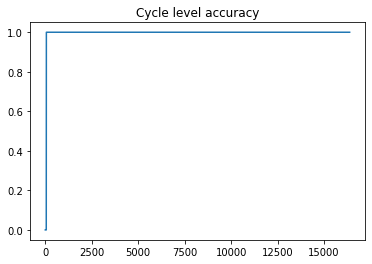

In [7]:
correct_binary = 0
correct_unary = 0

bitwidth = 14
total = 0

# binary MLP3_clamp weight init
rng = "Sobol"
encode = "RC"
rng_dim = 1
relu_buf_dep = 4
mode = "bipolar"
scaled = False
bias = True
sample_cnt = 1
threshold = 0.1

start_cnt = 0
current_index = 0

cycle_correct = torch.zeros(2**(bitwidth)).to(device)

start_time = time.time()

with torch.no_grad():
    for data in testloader:
        if current_index < start_cnt:
            current_index = current_index + 1
            continue
        current_index = current_index + 1

        total += labels.size(0)

        images, labels = data[0].to(device), data[1].to(device)
        
        # reference binary mlp
        outputs_binary = model_clamp(images)
        _, predicted_binary = torch.max(outputs_binary.data, 1)
        correct_binary += (predicted_binary == labels).sum().item()
        
#         print(model_clamp.fc1_out.min().item(), model_clamp.fc1_out.max().item())
#         print(model_clamp.fc2_out.min().item(), model_clamp.fc2_out.max().item())
#         print(model_clamp.fc3_out.min().item(), model_clamp.fc3_out.max().item())

        # unary part
        # input image check
        image = images.view(-1, 32*32)
        
        image_plot = image[0].cpu().numpy()
        fig = plt.hist(image_plot, bins='auto')  # arguments are passed to np.histogram
        plt.title("image pixel distribution")
        plt.show()
        
        image_SRC = SourceGen(image, bitwidth=bitwidth, mode=mode)().to(device)
        image_RNG = RNG(bitwidth, rng_dim, rng)().to(device)
        image_BSG = BSGen(image_SRC, image_RNG).to(device)
        image_ERR = ProgressiveError(image, mode=mode).to(device)
        image_NS = NormStability(image, mode=mode, threshold=threshold).to(device)
        
        # unary mlp is decomposed into separate layers
        fc1_unary = UnaryLinear(32*32, 512, model_clamp.fc1.weight.data, model_clamp.fc1.bias.data, 
                                bitwidth=bitwidth, mode=mode, scaled=scaled, bias=bias).to(device)
        fc1_ERR = ProgressiveError(model_clamp.fc1_out.clamp(-1, 1), mode=mode).to(device)
        fc1_NS = NormStability(model_clamp.fc1_out.clamp(-1, 1), mode=mode, threshold=threshold).to(device)

        fc2_unary = UnaryLinear(512, 512, model_clamp.fc2.weight.data, model_clamp.fc2.bias.data, 
                                bitwidth=bitwidth, mode=mode, scaled=scaled, bias=bias).to(device)
        fc2_ERR = ProgressiveError(model_clamp.fc2_out.clamp(-1, 1), mode=mode).to(device)
        fc2_NS = NormStability(model_clamp.fc2_out.clamp(-1, 1), mode=mode, threshold=threshold).to(device)

        fc3_unary = UnaryLinear(512, 10, model_clamp.fc3.weight.data, model_clamp.fc3.bias.data, 
                                bitwidth=bitwidth, mode=mode, scaled=scaled, bias=bias).to(device)
        fc3_ERR = ProgressiveError(model_clamp.fc3_out.clamp(-1, 1), mode=mode).to(device)
        fc3_NS = NormStability(model_clamp.fc3_out.clamp(-1, 1), mode=mode, threshold=threshold).to(device)

        relu1_unary = UnaryReLU(depth=relu_buf_dep, bitwidth=bitwidth, encode=encode).to(device)
        relu1_ERR = ProgressiveError(model_clamp.relu1_out.clamp(-1, 1), mode=mode).to(device)
        relu1_NS = NormStability(model_clamp.relu1_out.clamp(-1, 1), mode=mode, threshold=threshold).to(device)

        relu2_unary = UnaryReLU(depth=relu_buf_dep, bitwidth=bitwidth, encode=encode).to(device)
        relu2_ERR = ProgressiveError(model_clamp.relu2_out.clamp(-1, 1), mode=mode).to(device)
        relu2_NS = NormStability(model_clamp.relu2_out.clamp(-1, 1), mode=mode, threshold=threshold).to(device)
        
        if total%100 == 0:
            print("--- %s seconds ---" % (time.time() - start_time))
            print(total, "images are done!!!")

#         print(current_index, "-th image with label", labels.item(), ", total image count", total)
        for i in range(2**(bitwidth)):
            idx = torch.zeros(image_SRC.size()).type(torch.long).to(device)
            image_bs = image_BSG(idx + i)
            image_ERR.Monitor(image_bs)
            image_NS.Monitor(image_bs)

            # fc1
            fc1_unary_out   = fc1_unary(image_bs)
            fc1_ERR.Monitor(fc1_unary_out)
            fc1_NS.Monitor(fc1_unary_out)

            # relu1
            relu1_unary_out = relu1_unary(fc1_unary_out)
            relu1_ERR.Monitor(relu1_unary_out)
            relu1_NS.Monitor(relu1_unary_out)
            
            # fc2
            fc2_unary_out   = fc2_unary(relu1_unary_out)
            fc2_ERR.Monitor(fc2_unary_out)
            fc2_NS.Monitor(fc2_unary_out)
            
            # relu2
            relu2_unary_out = relu2_unary(fc2_unary_out)
            relu2_ERR.Monitor(relu2_unary_out)
            relu2_NS.Monitor(relu2_unary_out)
            
            # fc3
            fc3_unary_out   = fc3_unary(relu2_unary_out)
            fc3_ERR.Monitor(fc3_unary_out)
            fc3_NS.Monitor(fc3_unary_out)
            
            _, predicted_unary = torch.max(fc3_ERR()[0], 1)
            if predicted_unary == labels:
                print(i, "cycle: ", current_index, "-th image succeeds.")
#                 print(current_index, "-th image with label", labels.item(), ", total image count", total)
#                 print("before", predicted_unary.item(), cycle_correct[predicted_unary.item()].item())
                cycle_correct[i].add_(1)
#                 print("after", predicted_unary.item(), cycle_correct[predicted_unary.item()].item())
        
        print(image_bs.shape)
        print(fc1_unary_out.shape)
        print(relu1_unary_out.shape)
        print(fc2_unary_out.shape)
        print(relu2_unary_out.shape)
        print(fc3_unary_out.shape)
        
#         fc1_out_plot_b = model_clamp.fc1_out[0].cpu().numpy()
# #         fig = plt.hist(fc1_out_plot_b, bins='auto')  # arguments are passed to np.histogram
#         fig = plt.plot(fc1_out_plot_b)  # arguments are passed to np.histogram
#         plt.title("fc1_out_plot_b distribution")
#         plt.show()
        
#         fc1_out_plot_u = fc1_ERR()[1][0].cpu().numpy()
# #         fig = plt.hist(fc1_out_plot_u, bins='auto')  # arguments are passed to np.histogram
#         fig = plt.plot(fc1_out_plot_u)  # arguments are passed to np.histogram
#         plt.title("fc1_out_plot_u distribution")
#         plt.show()
        
        to_print = 1
        print("ERR: min, max, mean")
        print("image: ", 
              image_ERR()[to_print].min().item(), 
              image_ERR()[to_print].max().item(),
              image_ERR()[to_print].mul(image_ERR()[to_print]).mean().sqrt().item())
        print("fc1:   ", 
              fc1_ERR()[to_print].min().item(), 
              fc1_ERR()[to_print].max().item(), 
              fc1_ERR()[to_print].mul(fc1_ERR()[to_print]).mean().sqrt().item())
        print("relu1: ", 
              relu1_ERR()[to_print].min().item(), 
              relu1_ERR()[to_print].max().item(), 
              relu1_ERR()[to_print].mul(relu1_ERR()[to_print]).mean().sqrt().item())
        print("fc2:   ", 
              fc2_ERR()[to_print].min().item(), 
              fc2_ERR()[to_print].max().item(), 
              fc2_ERR()[to_print].mul(fc2_ERR()[to_print]).mean().sqrt().item())
        print("relu2: ", 
              relu2_ERR()[to_print].min().item(), 
              relu2_ERR()[to_print].max().item(), 
              relu2_ERR()[to_print].mul(relu2_ERR()[to_print]).mean().sqrt().item())
        print("fc3:   ", 
              fc3_ERR()[to_print].min().item(), 
              fc3_ERR()[to_print].max().item(), 
              fc3_ERR()[to_print].mul(fc3_ERR()[to_print]).mean().sqrt().item())
        print()
        
        to_print = 1
        print("NS: min, max, mean")
        print("image: ", 
              image_NS().min().item(), 
              image_NS().max().item(),
              image_NS().mean().item())
        print("fc1:   ", 
              fc1_NS().min().item(), 
              fc1_NS().max().item(), 
              fc1_NS().mean().item())
        print("relu1: ", 
              relu1_NS().min().item(), 
              relu1_NS().max().item(), 
              relu1_NS().mean().item())
        print("fc2:   ", 
              fc2_NS().min().item(), 
              fc2_NS().max().item(), 
              fc2_NS().mean().item())
        print("relu2: ", 
              relu2_NS().min().item(), 
              relu2_NS().max().item(), 
              relu2_NS().mean().item())
        print("fc3:   ", 
              fc3_NS().min().item(), 
              fc3_NS().max().item(), 
              fc3_NS().mean().item())
        print()
        _, predicted_unary = torch.max(fc3_ERR()[0], 1)
        correct_unary += (predicted_unary == labels).sum().item()
        if total == sample_cnt:
            break

print('Accuracy of the network on %d test images: %f %%' % (total,
    100 * correct_binary / total))
print('Accuracy of the network on %d test images: %f %%' % (total,
    100 * correct_unary / total))

result = cycle_correct.cpu().numpy()/total
fig = plt.plot([i for i in range(2**bitwidth)], result)  # arguments are passed to np.histogram
plt.title("Cycle level accuracy")
plt.show()

